
=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

/tmp/ipykernel_846316/935357459.py:413: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_846316/935357459.py:431: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()


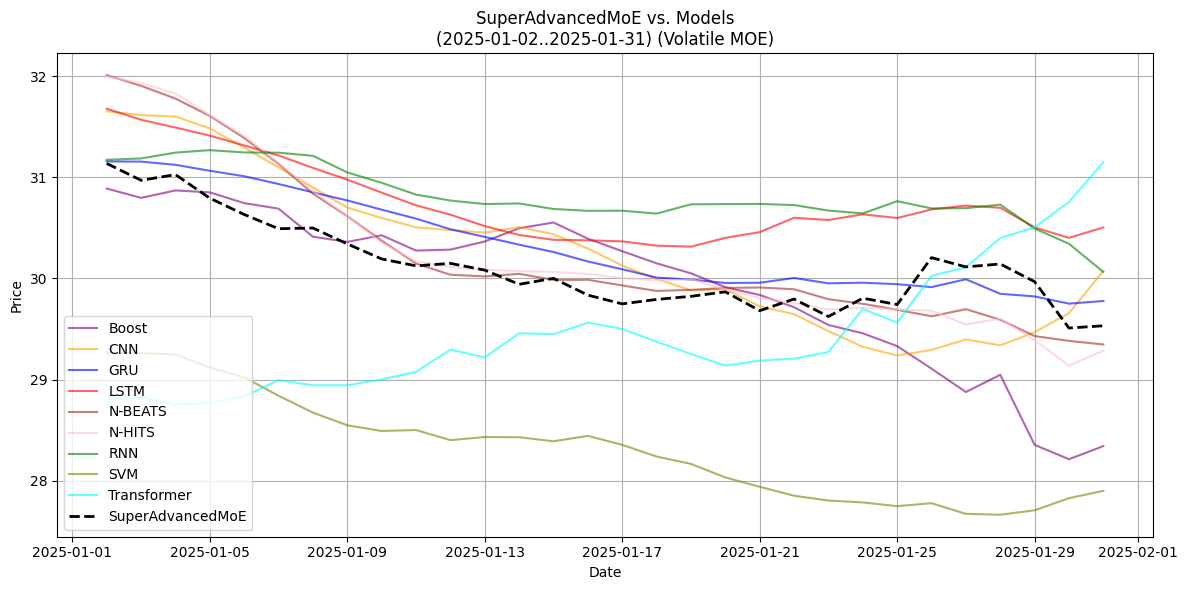

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

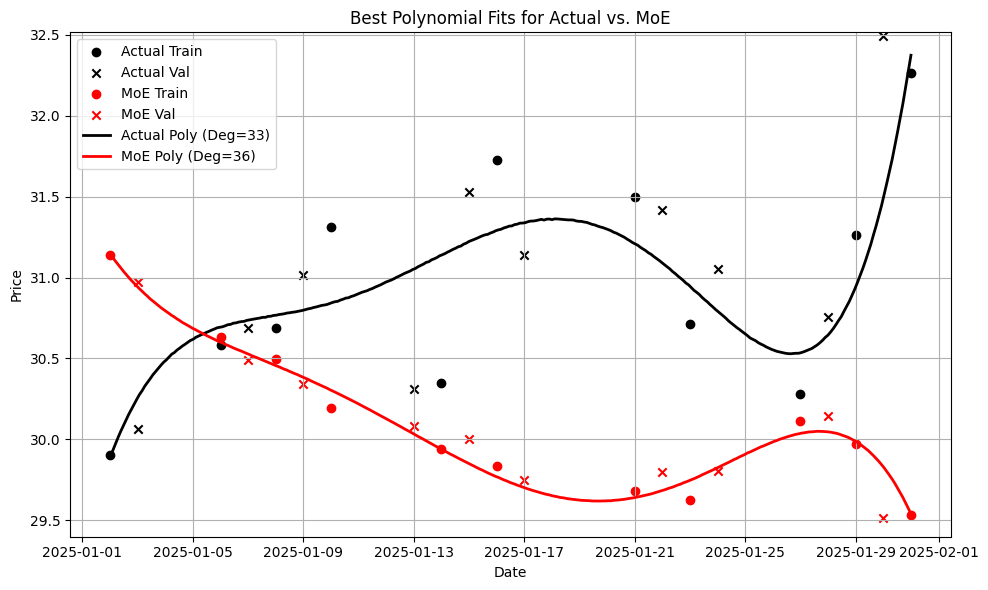


=== Best Polynomial Fitting Results ===
[Actual] => Degree=33, Val MSE=0.196528
     y = 3.1306e-130*x^33+5.7268e-127*x^32-5.2944e-122*x^31-1.6228e-117*x^30-3.3030e-113*x^29-5.3272e-109*x^28-6.4770e-105*x^27-3.8701e-101*x^26+1.1066e-96*x^25+5.3698e-92*x^24+1.5450e-87*x^23+3.5944e-83*x^22+7.3665e-79*x^21+1.3457e-74*x^20+2.1904e-70*x^19+2.8363e-66*x^18+1.8197e-62*x^17-3.9173e-58*x^16-2.2837e-53*x^15-7.0772e-49*x^14-1.7832e-44*x^13-3.9486e-40*x^12-7.7481e-36*x^11-1.3630e-31*x^10-1.8924e-27*x^9-1.6456e-23*x^8+1.9813e-19*x^7+1.5442e-14*x^6+5.0809e-10*x^5+1.2593e-05*x^4+2.5026e-01*x^3+3.3065e+03*x^2-1.4261e+07*x-3.1924e+12

[MoE] => Degree=36, Val MSE=0.015588
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*x^18+6.1757e-63*x

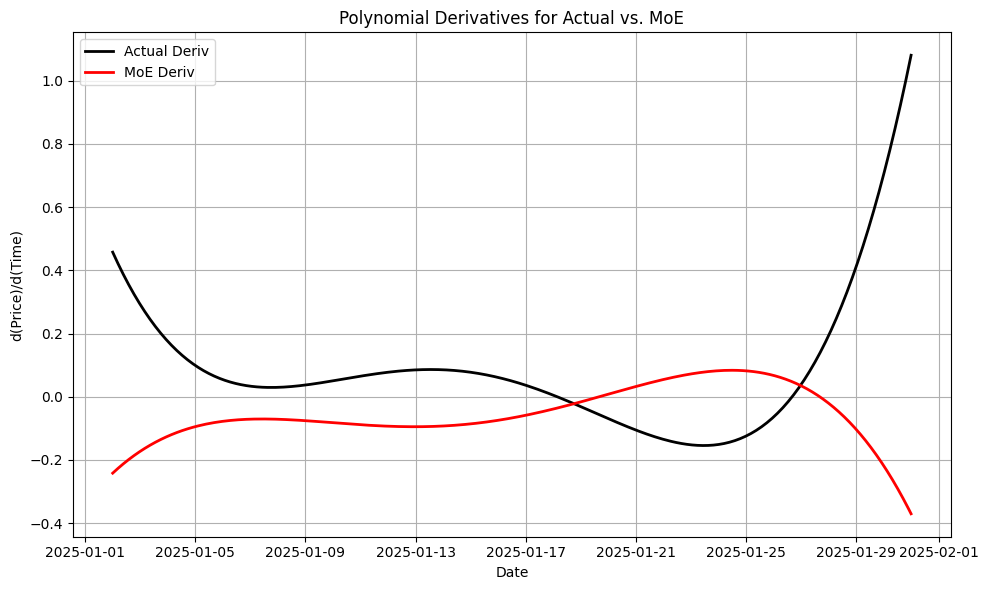

In [2]:
####################################################
# SUPER MERGED SCRIPT: Code Snippet 2 + Snippet 1
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# 0) Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# GLOBALS
############################################
BEST_MODELS_DIR = "."   # Where your best_{mt}_{YYYY-mm-dd}_V1 pt/pkl model files are
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example cutoffs (tweak if needed to match your data)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Data Loading (like snippet 2 does)
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    """
    Loads two CSVs:
      1) 'train_csv': for training date range, e.g. 'Silver Futures Historical Data.csv'
      2) 'complete_csv': the entire timeline, e.g. 'Silver Futures Historical Data_Complete.csv'
    Then sorts/drops columns, fits a MinMaxScaler from the train portion,
    returns (df_sorted, df_complete, scaler).
    """
    # Load train CSV
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Simple date splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler


############################################
# 2) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)

        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)

        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) "Rolling" or "Daily" Forecast (Snippet 2 style)
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    Code Snippet 2 style: For each day in date range [start_pred..end_pred],
    we "load" each model with the naming best_{mt}_{day_i}_V1,
    forecast next horizon_days, etc. Return a big DF with all predictions.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # Load each model from best_{mt}_{day_i}_V1
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        if do_daily_plots and (day_i== date_rng[-1]):
            pass  # Optionally, you can do daily plots here

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all


############################################
# 4) Mixture of Experts Computation (Snippet 2)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate), measure january performance => build table
    Code snippet 2 approach for "super advanced MoE".
    ...
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Creates the final MoE dataframe from snippet 2 approach.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


############################################
# 5) Plot + Polynomial Fitting from Snippet 1
############################################
def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    We can display all 9 model lines + the advanced MoE in [from_d..to_d].
    Similar to snippet 2 code.
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","GPR":"teal","Boost":"purple"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()}) (Volatile MOE)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def polynomial_fitting_actual_and_moe(df_moe,
                                      csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
                                      max_degree=70):
    """
    As in snippet 1: we do polynomial fittings for "MoE" vs. "Actual"
    (like Code Snippet 1's final steps).
    """
    # Load actual data
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"]= df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename= df_moe.rename(columns={"ForecastDate":"Date","MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # merge => columns: ["Date","MoE","Price"]
    df_merge= pd.merge(
        df_moe_rename, df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    columns_to_fit= ["Actual","MoE"]
    df_merge["mdates_num"]= mdates.date2num(df_merge["Date"])
    n_points= len(df_merge)
    idx= np.arange(n_points)
    train_mask = (idx % 2==0)
    val_mask= ~train_mask

    best_poly_info= {}

    def format_poly(coeffs):
        terms=[]
        deg= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    # Fit polynomials
    from sklearn.metrics import mean_squared_error
    for col in columns_to_fit:
        x_train= df_merge.loc[train_mask,"mdates_num"].values
        y_train= df_merge.loc[train_mask,col].values
        x_val= df_merge.loc[val_mask,"mdates_num"].values
        y_val= df_merge.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None

        for d_ in range(1, max_degree+1):
            coefs= np.polyfit(x_train, y_train, d_)
            preds_val= np.polyval(coefs, x_val)
            mse_= mean_squared_error(y_val, preds_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        best_poly_info[col]= {"degree": best_deg, "mse":best_mse, "coeffs": best_coefs}

    # Plot the best polynomials
    plt.figure(figsize=(10,6))
    # scatter actual data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"Actual"],
                color="black", marker="x", label="Actual Val")

    # scatter MoE data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"MoE"],
                color="red", marker="x", label="MoE Val")

    x_dense= np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    color_map= {"Actual":"black","MoE":"red"}
    for col in columns_to_fit:
        info= best_poly_info[col]
        deg_= info["degree"]
        coefs_= info["coeffs"]
        color_= color_map[col] if col in color_map else "gray"
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_, linewidth=2,
                 label=f"{col} Poly (Deg={deg_})")

    plt.title("Best Polynomial Fits for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting Results ===")
    for col in columns_to_fit:
        deg_= best_poly_info[col]["degree"]
        mse_= best_poly_info[col]["mse"]
        coefs_= best_poly_info[col]["coeffs"]
        expr_= format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # Derivative
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_= best_poly_info[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        d_expr_= format_poly(d_coefs_)
        y_deriv= np.polyval(d_coefs_, x_dense)

        color_ = color_map[col] if col in color_map else "gray"
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Deriv")

        print(f"=== Derivative for {col} (Degree {best_poly_info[col]['degree']-1}) ===")
        print(f"   d/dx: {d_expr_}\n")

    plt.title("Polynomial Derivatives for Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 6) MAIN EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day predictions for each day,
    #    then compute the super advanced MoE.
    #    This uses snippet 2's logic.
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(40))

    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 3) Plot super advanced MoE vs. the 9 base models
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 4) Polynomial Fitting: Actual vs. MoE
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
        max_degree=70
    )


   



=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-02_V1.pt
[PyTorc

/tmp/ipykernel_846316/2635506615.py:377: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_846316/2635506615.py:396: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()



=== HEAD of df_moe (Mixture of Experts) ===
   ForecastDate  MOE_Price
0    2025-01-02  31.136401
1    2025-01-03  30.970069
2    2025-01-04  31.026172
3    2025-01-05  30.793378
4    2025-01-06  30.632033
5    2025-01-07  30.491692
6    2025-01-08  30.498652
7    2025-01-09  30.341420
8    2025-01-10  30.192963
9    2025-01-11  30.124421
10   2025-01-12  30.149025
11   2025-01-13  30.082354
12   2025-01-14  29.942405
13   2025-01-15  30.001112
14   2025-01-16  29.835280
15   2025-01-17  29.748771
16   2025-01-18  29.792722
17   2025-01-19  29.823317
18   2025-01-20  29.867903
19   2025-01-21  29.681442

=== HEAD of df_rolled_all (9 base + MoE) ===
    Model ForecastDate  Pred_Price_unscaled
0   Boost   2024-12-01            31.141379
1   Boost   2024-12-02            31.091115
2   Boost   2024-12-03            31.282761
3   Boost   2024-12-04            31.519567
4   Boost   2024-12-05            31.179962
5   Boost   2024-12-06            31.389226
6   Boost   2024-12-07            

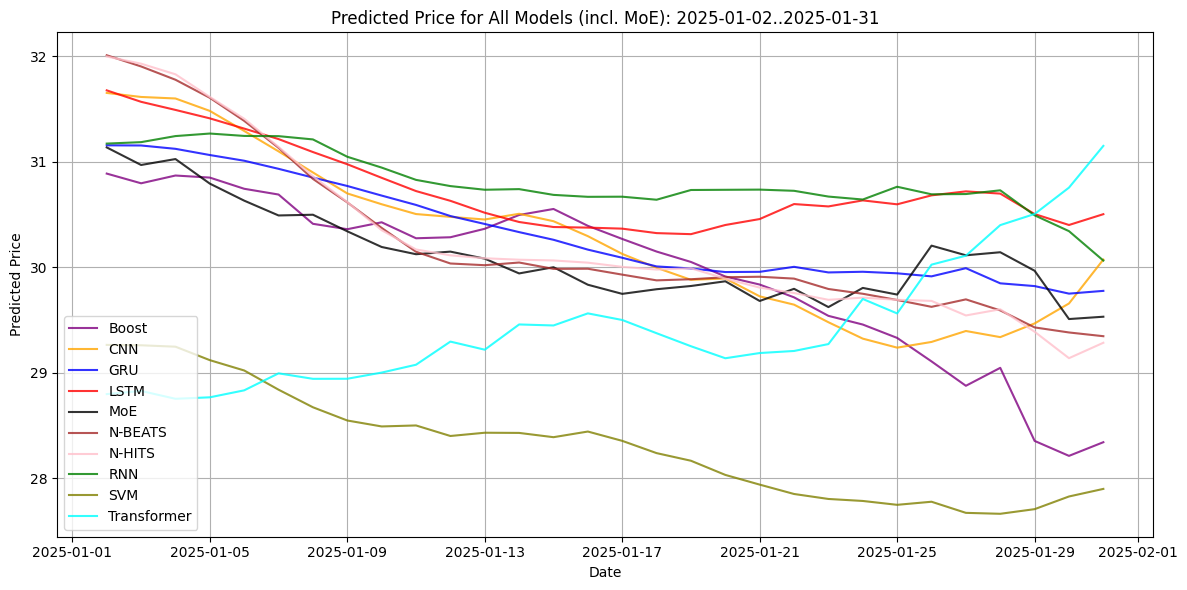


=== HEAD of df_diff_all (Daily Differences, 9 base + MoE) ===
    Model       Date  Pred_Price_unscaled  ActualPrice  DailyDiff  AbsError
0   Boost 2024-12-02            31.091115       30.742   0.349115  0.349115
1   Boost 2024-12-03            31.282761       31.363  -0.080239  0.080239
2   Boost 2024-12-04            31.519567       31.786  -0.266433  0.266433
3   Boost 2024-12-05            31.179962       31.406  -0.226038  0.226038
4   Boost 2024-12-06            31.389226       31.462  -0.072774  0.072774
5   Boost 2024-12-09            32.061589       32.481  -0.419411  0.419411
6   Boost 2024-12-10            31.804926       32.612  -0.807074  0.807074
7   Boost 2024-12-11            31.346929       32.823  -1.476071  1.476071
8   Boost 2024-12-12            31.187709       31.482  -0.294291  0.294291
9   Boost 2024-12-13            30.724558       30.892  -0.167442  0.167442
10  Boost 2024-12-16            30.010389       30.927  -0.916611  0.916611
11  Boost 2024-12-17     

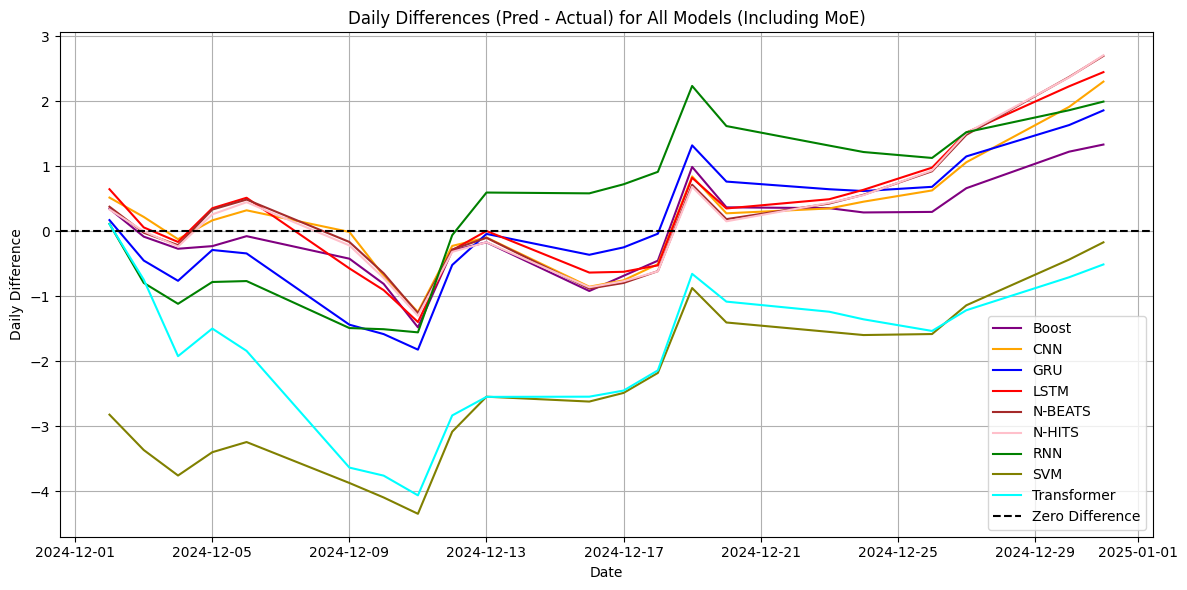


=== Model Scores (Including MoE) ===
         Model  cumulative_error  trend_matching_rate  normalized_error_score  \
0       N-HITS         15.605387                 0.65                0.900566   
1        Boost         11.751144                 0.60                1.000000   
2      N-BEATS         15.552836                 0.60                0.901922   
3          CNN         13.565782                 0.55                0.953185   
4         LSTM         16.188882                 0.55                0.885513   
5          RNN         23.912927                 0.55                0.686244   
6          GRU         16.733603                 0.40                0.871460   
7          SVM         50.513074                 0.60                0.000000   
8  Transformer         38.338727                 0.40                0.314080   

   combined_confidence  
0             0.725170  
1             0.720000  
2             0.690577  
3             0.670956  
4             0.650654  
5

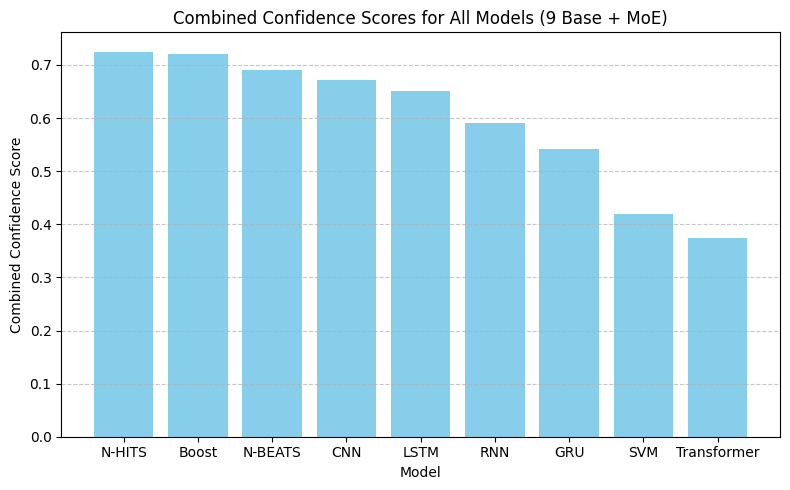


=== Best Polynomial Fitting Results for Top-5 + Actual ===
[Actual] => Deg=6  ValMSE=0.316816
    y = -3.4008e-14*x^6+1.5933e-09*x^5-4.5812e-06*x^4-5.5031e-01*x^3-1.8361e+03*x^2+2.5869e+08*x-2.2262e+12

[N-HITS] => Deg=10  ValMSE=0.046900
    y = -4.9063e-32*x^10+9.8488e-28*x^9+1.9778e-23*x^8+6.6218e-20*x^7-5.3147e-15*x^6-1.6004e-10*x^5-2.1423e-06*x^4+1.0798e-02*x^3+1.2946e+03*x^2+2.5978e+07*x-5.2169e+11

[Boost] => Deg=10  ValMSE=0.068852
    y = -3.3434e-32*x^10+6.7113e-28*x^9+1.3478e-23*x^8+4.5133e-20*x^7-3.6215e-15*x^6-1.0905e-10*x^5-1.4599e-06*x^4+7.3565e-03*x^3+8.8217e+02*x^2+1.7702e+07*x-3.5548e+11

[N-BEATS] => Deg=9  ValMSE=0.046737
    y = -1.4846e-27*x^9+3.6433e-23*x^8+5.6521e-19*x^7-2.0074e-15*x^6-2.4120e-10*x^5-4.8455e-06*x^4-1.6024e-02*x^3+1.8446e+03*x^2+4.7778e+07*x-7.8564e+11

[CNN] => Deg=10  ValMSE=0.084586
    y = -3.7101e-32*x^10+7.4481e-28*x^9+1.4956e-23*x^8+5.0061e-20*x^7-4.0195e-15*x^6-1.2103e-10*x^5-1.6201e-06*x^4+8.1688e-03*x^3+9.7912e+02*x^2+1.9646e+07*x-3.94

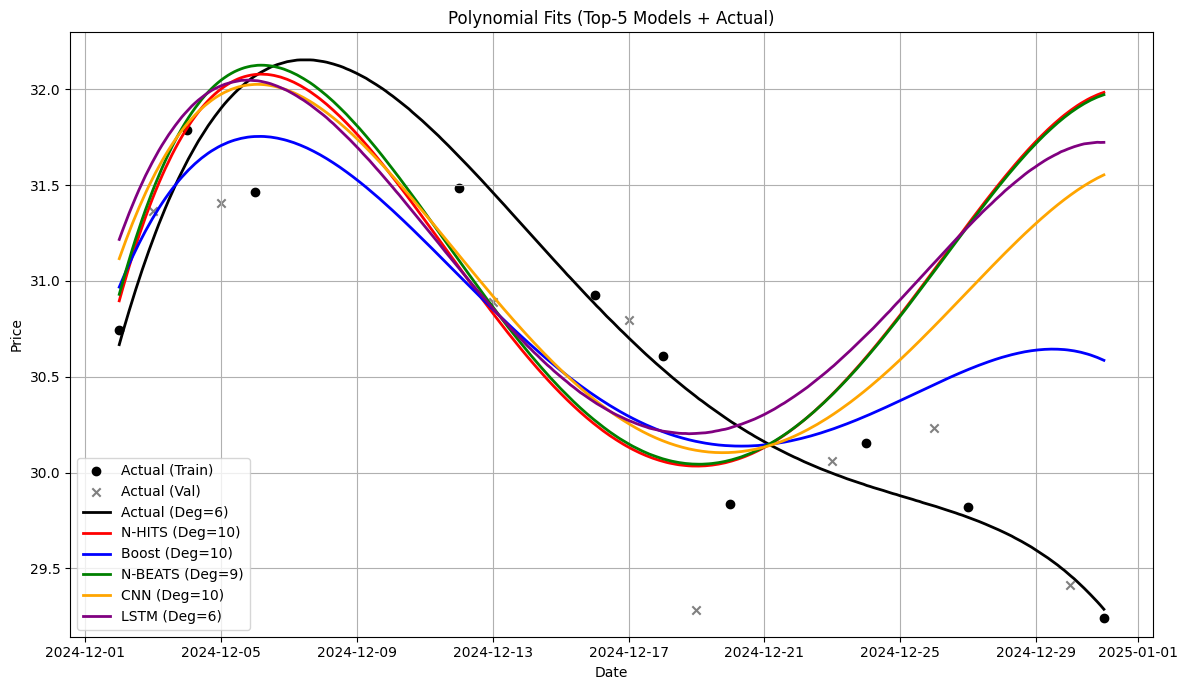

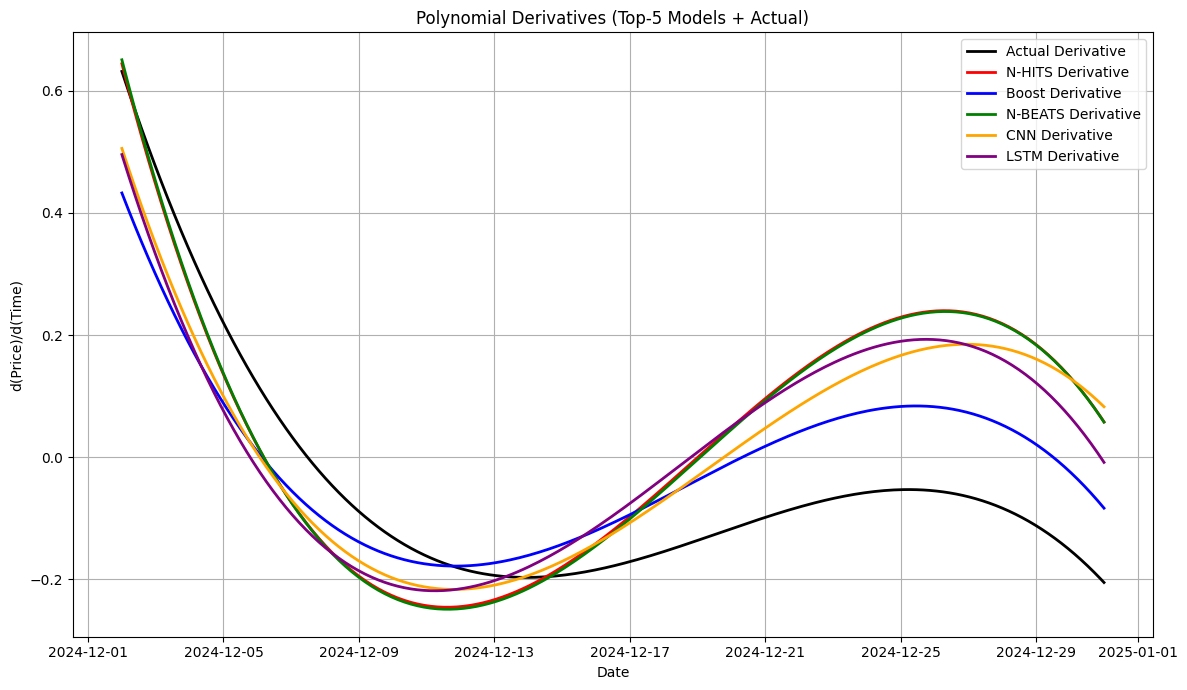


All done!


In [3]:
########################################################
# REVISED COMPLETE SCRIPT:
# Ensuring Mixture of Experts is in every plot/analysis
# and fixing pivot duplicates ("Index contains duplicates").
########################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# Globals
############################################
BEST_MODELS_DIR = "."   
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Load & scale data
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # Also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 2) Model definitions & loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)
        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)
        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)
        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)
        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)
        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)
        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)
        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)
        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast
        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)

############################################
# 3) Rolling multi-day Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.01):
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)

def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30
):
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()}")

        # load each model
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        # forecast
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                all_records.append(df_fc)

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    if not df_all.empty:
        df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Compute Mixture of Experts
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_):
            vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0 - ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        # mild noise
        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

############################################
# 5) Plot MoE
############################################
def plot_super_advanced_moe_vs_models(df_rolled_all, from_d, to_d):
    """
    Now df_rolled_all includes "MoE" as a model as well.
    We'll just show everything in [from_d..to_d].
    """
    df_sel= df_rolled_all[
        (df_rolled_all["ForecastDate"]>= from_d)&
        (df_rolled_all["ForecastDate"]<= to_d)
    ].copy()
    if df_sel.empty:
        print("No data to plot in that date range.")
        return

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for model_name in df_sel["Model"].unique():
        sub= df_sel[df_sel["Model"]== model_name].copy()
        sub_agg= sub.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(model_name, "gray")
        plt.plot(sub_agg["ForecastDate"], sub_agg["Pred_Price_unscaled"], color=c, label=model_name, alpha=0.8)

    plt.title(f"Predicted Price for All Models (incl. MoE): {from_d.date()}..{to_d.date()}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 6) Combine MoE with the base forecasts & reduce duplicates
############################################
def reduce_duplicates(df_in):
    """
    If (Model, ForecastDate) appears multiple times, we average the predictions.
    This avoids pivot errors with duplicates.
    """
    # We'll just keep the mean of 'Pred_Price_unscaled'
    # and drop other columns like Pred_Open_unscaled, etc. for brevity
    # If you want them, you can also average them or do similar.
    agg_df = df_in.groupby(["Model","ForecastDate"], as_index=False).agg({
        "Pred_Price_unscaled":"mean"
    })
    return agg_df

def combine_base_and_moe(final_rolling_fc, df_moe):
    # Mark columns for moE similarly to the base
    df_moe_cpy = df_moe.copy()
    df_moe_cpy["Model"] = "MoE"
    df_moe_cpy["BaseDate"] = pd.NaT
    df_moe_cpy.rename(columns={"MOE_Price":"Pred_Price_unscaled"}, inplace=True)

    # We'll unify the columns we care about for the pivot & daily difference
    # final_rolling_fc => ["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]
    # df_moe_cpy => same columns, but we rename ForecastDate -> ForecastDate if needed
    # Actually df_moe already has "ForecastDate" and "MOE_Price"
    # So let's just keep: "Model","ForecastDate","Pred_Price_unscaled"
    df_moe_cpy = df_moe_cpy[["Model","ForecastDate","Pred_Price_unscaled"]].copy()

    df_base = final_rolling_fc[["Model","ForecastDate","Pred_Price_unscaled"]].copy()
    # Now combine
    df_combined = pd.concat([df_base, df_moe_cpy], ignore_index=True)

    # reduce duplicates
    df_no_dupes = reduce_duplicates(df_combined)
    # sort
    df_no_dupes.sort_values(["Model","ForecastDate"], inplace=True, ignore_index=True)
    return df_no_dupes

############################################
# 7) Daily Differences vs. Actual
############################################
def merge_with_actual_and_diff(df_all_models, df_actual):
    # Merge on ForecastDate vs. df_actual => Price
    # rename Price->ActualPrice
    df_actual_cpy = df_actual[["Date","Price"]].rename(columns={"Price":"ActualPrice"}).copy()

    df_merged = pd.merge(
        df_all_models,  # has Model, ForecastDate, Pred_Price_unscaled
        df_actual_cpy,
        left_on="ForecastDate",
        right_on="Date",
        how="left"
    )
    df_merged.dropna(subset=["ActualPrice"], inplace=True)
    df_merged.drop(columns=["Date"], inplace=True, errors="ignore")

    # rename ForecastDate->Date
    df_merged.rename(columns={"ForecastDate":"Date"}, inplace=True)
    # daily diff
    df_merged["DailyDiff"] = df_merged["Pred_Price_unscaled"] - df_merged["ActualPrice"]
    df_merged["AbsError"]  = df_merged["DailyDiff"].abs()

    # final sort
    df_merged.sort_values(["Model","Date"], inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged

def plot_daily_differences_all_models(df_diff):
    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for m in df_diff["Model"].unique():
        sub= df_diff[df_diff["Model"]==m].copy()
        sub_agg= sub.groupby("Date", as_index=False)["DailyDiff"].mean()
        c= color_map.get(m,"gray")
        plt.plot(sub_agg["Date"], sub_agg["DailyDiff"], label=m, color=c)

    plt.axhline(0, color="black", linestyle="--", label="Zero Difference")
    plt.title("Daily Differences (Pred - Actual) for All Models (Including MoE)")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 8) Evaluate errors & confidence => top 5
############################################
def evaluate_models_confidence(df_diff):
    # For each model, sum absolute error, compute trend matching fraction
    model_scores = {}
    for m in df_diff["Model"].unique():
        dsub= df_diff[df_diff["Model"]==m].copy()
        if dsub.empty: 
            continue
        cum_err= dsub["AbsError"].sum()

        dsub.sort_values("Date", inplace=True)
        dsub["ActualDiff"] = dsub["ActualPrice"].diff()
        dsub["PredDiff"]   = dsub["Pred_Price_unscaled"].diff()
        dsub_valid= dsub.dropna(subset=["ActualDiff","PredDiff"]).copy()
        def sign_match(a,b):
            if a==0 and b==0:
                return True
            return np.sign(a)==np.sign(b)
        dsub_valid["TrendMatch"] = dsub_valid.apply(lambda r: 1 if sign_match(r["ActualDiff"],r["PredDiff"]) else 0, axis=1)
        if len(dsub_valid)>0:
            trend_rate= dsub_valid["TrendMatch"].mean()
        else:
            trend_rate= 0.0

        model_scores[m] = {
            "cumulative_error": cum_err,
            "trend_matching_rate": trend_rate
        }

    df_scores= pd.DataFrame.from_dict(model_scores, orient="index").reset_index()
    df_scores.rename(columns={"index":"Model"}, inplace=True)

    if not df_scores.empty:
        ce_min= df_scores["cumulative_error"].min()
        ce_max= df_scores["cumulative_error"].max()
        if not np.isclose(ce_min, ce_max):
            # normalized error => 1 is best (lowest error)
            df_scores["normalized_error_score"] = 1.0 - (df_scores["cumulative_error"]-ce_min)/(ce_max-ce_min)
        else:
            df_scores["normalized_error_score"] = 1.0
        df_scores["combined_confidence"] = 0.7*df_scores["trend_matching_rate"] + 0.3*df_scores["normalized_error_score"]
        df_scores.sort_values("combined_confidence", ascending=False, inplace=True)
        df_scores.reset_index(drop=True, inplace=True)
    return df_scores

def barplot_confidence_scores(df_scores):
    plt.figure(figsize=(8,5))
    plt.bar(df_scores["Model"], df_scores["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title("Combined Confidence Scores for All Models (9 Base + MoE)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

############################################
# 9) Polynomial fitting top-5
############################################
def polynomial_fit_top5_models(df_diff, df_scores, max_degree=35):
    """
    1) Pick top 5 from df_scores
    2) pivot so we have columns: [Date, Actual, M1, M2, M3...]
    3) Fit polynomials for each col, plot them, also derivatives
    """
    top5 = df_scores.head(5)["Model"].tolist()
    # pivot => row=Date, col=Model, val=Pred_Price_unscaled
    # but we also want 'Actual' as a separate column
    # We'll create pivot for predictions:
    df_pivot = df_diff.pivot_table(
        index="Date", columns="Model", values="Pred_Price_unscaled", aggfunc="mean"
    ).reset_index()

    # Also gather actual => 'ActualPrice' from df_diff
    # We'll pick one row per Date
    df_actual_only = df_diff.drop_duplicates("Date")[["Date","ActualPrice"]].copy()

    # Merge them
    df_merged = pd.merge(df_pivot, df_actual_only, on="Date", how="inner")
    # rename ActualPrice->Actual
    df_merged.rename(columns={"ActualPrice":"Actual"}, inplace=True)
    df_merged.sort_values("Date", inplace=True)
    df_merged.reset_index(drop=True, inplace=True)

    # drop rows with NaN in columns of interest
    columns_to_fit = ["Actual"] + top5
    df_merged = df_merged[["Date"] + columns_to_fit].dropna()
    if df_merged.empty:
        print("No data available to do polynomial fitting for top-5.")
        return

    df_merged["mdates_num"] = mdates.date2num(df_merged["Date"])
    # train/val split
    n_points = len(df_merged)
    idx= np.arange(n_points)
    train_mask= (idx % 2==0)
    val_mask= ~train_mask

    def format_poly(coefs):
        terms=[]
        deg= len(coefs)-1
        for i,c in enumerate(coefs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    best_poly= {}
    from sklearn.metrics import mean_squared_error

    for col in columns_to_fit:
        x_train= df_merged.loc[train_mask,"mdates_num"].values
        y_train= df_merged.loc[train_mask,col].values
        x_val= df_merged.loc[val_mask,"mdates_num"].values
        y_val= df_merged.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None
        for d_ in range(1, max_degree+1):
            if len(x_train)<=d_:
                break
            coefs= np.polyfit(x_train, y_train, d_)
            y_pred_val= np.polyval(coefs, x_val)
            mse_ = mean_squared_error(y_val, y_pred_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        if best_coefs is not None:
            best_poly[col]= {
                "degree": best_deg,
                "mse": best_mse,
                "coeffs": best_coefs
            }
        else:
            best_poly[col]= {
                "degree":0,"mse":9999.0,"coeffs":[0.0]
            }

    # Print
    print("\n=== Best Polynomial Fitting Results for Top-5 + Actual ===")
    for col in columns_to_fit:
        info= best_poly[col]
        expr= format_poly(info["coeffs"])
        print(f"[{col}] => Deg={info['degree']}  ValMSE={info['mse']:.6f}")
        print(f"    y = {expr}\n")

    # Plot polynomials
    plt.figure(figsize=(12,7))
    color_map= {
        "Actual":"black",
        top5[0]:"red", top5[1]:"blue", top5[2]:"green", top5[3]:"orange", top5[4]:"purple"
    }
    # scatter actual data
    plt.scatter(df_merged.loc[train_mask,"Date"], df_merged.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual (Train)")
    plt.scatter(df_merged.loc[val_mask,"Date"], df_merged.loc[val_mask,"Actual"],
                color="gray", marker="x", label="Actual (Val)")

    x_dense= np.linspace(df_merged["mdates_num"].min(), df_merged["mdates_num"].max(),300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        y_dense= np.polyval(coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_dense, color=c, lw=2, label=f"{col} (Deg={best_poly[col]['degree']})")

    plt.title("Polynomial Fits (Top-5 Models + Actual)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Derivatives
    plt.figure(figsize=(12,7))
    for col in columns_to_fit:
        coefs= best_poly[col]["coeffs"]
        d_coefs= np.polyder(coefs)
        y_deriv= np.polyval(d_coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_deriv, color=c, lw=2, label=f"{col} Derivative")

    plt.title("Polynomial Derivatives (Top-5 Models + Actual)")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 10) MAIN
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day forecasts for base models
    base_model_types= ["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"]
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=base_model_types,
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30
    )
    print("\n=== HEAD of final_rolling_fc (9 models) ===")
    print(final_rolling_fc.head(20))

    # 3) Compute Mixture of Experts
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)
    print("\n=== HEAD of df_moe (Mixture of Experts) ===")
    print(df_moe.head(20))

    # 4) Combine base + MoE => single DataFrame => reduce duplicates
    df_rolled_all= combine_base_and_moe(final_rolling_fc, df_moe)
    print("\n=== HEAD of df_rolled_all (9 base + MoE) ===")
    print(df_rolled_all.head(20))

    # 5) Plot all models including MoE in the 2025-01-02..2025-01-31 window
    plot_super_advanced_moe_vs_models(df_rolled_all,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 6) Merge with actual => daily differences
    df_diff_all = merge_with_actual_and_diff(df_rolled_all, df_complete_all)
    print("\n=== HEAD of df_diff_all (Daily Differences, 9 base + MoE) ===")
    print(df_diff_all.head(20))

    # 7) Plot daily differences => MoE now included
    plot_daily_differences_all_models(df_diff_all)

    # 8) Evaluate errors & confidence => top-5
    df_scores = evaluate_models_confidence(df_diff_all)
    print("\n=== Model Scores (Including MoE) ===")
    print(df_scores)

    barplot_confidence_scores(df_scores)

    # 9) Polynomial fitting for top-5
    polynomial_fit_top5_models(df_diff_all, df_scores, max_degree=35)

    print("\nAll done!")


In [6]:
############################################################
# Unified Script: 9 Base Models + Mixture of Experts as 10th
# Revised to show MoE in daily differences, errors, top-5, etc.
############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# 0) Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# Globals & Windowing
############################################
BEST_MODELS_DIR = "."   # Where best_{mt}_{YYYY-mm-dd}_V1 model files are stored
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Date cutoffs for your dataset
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")

############################################
# 1) Data Loading & Scaling
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    """
    Load a 'train_csv' limited to certain rows (like 'Silver Futures Historical Data.csv')
    and a 'complete_csv' with the entire timeline. Fit MinMaxScaler from the train portion.
    Return (df_scaled, df_complete, scaler).
    """
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Train, Val, Test splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    # Fit scaler on train portion only
    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    # Scale the train/val/test subsets
    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # Also load the complete CSV for the entire timeline
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler

############################################
# 2) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)

        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)

        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)

        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)

        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)

        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)

        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast

        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)

############################################
# 3) Rolling/Daily Forecast for Each Model
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    For each day in date range [start_pred..end_pred],
    load the best_{mt}_{day_i}_V1 model, forecast next horizon_days, etc.
    Return a big DF with all predictions from all models.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()}")

        # Load each model from best_{mt}_{YYYY-mm-dd}_V1
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        if do_daily_plots and (day_i== date_rng[-1]):
            pass  # optionally do some daily plot

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all

############################################
# 4) Mixture of Experts (MoE)
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate), measure performance in [2024-12-01..2025-01-01],
    then build a table used by the super advanced MoE weighting.
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0 - ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Creates the final MoE dataframe from snippet 2 approach.
    This will forecast for [2025-01-02..2025-01-31].
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        # random mild noise
        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe

############################################
# 5) Plot MOE vs. Models
############################################
def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    Plots all 9 base model lines + the advanced MoE in [from_d..to_d].
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        if df_m.empty: continue
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.7, label=m)

    # Plot MoE
    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="MoE")

    plt.title(f"SuperAdvancedMoE vs. Base Models\n({from_d.date()}..{to_d.date()})")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 6) Combine MoE as a Tenth Model
#    & Compute Daily Differences + Errors
############################################
def compute_daily_diff_for_all_models(df_all_models, df_moe, df_actual):
    """
    Merge each model's predictions (9 base + MoE) with actual,
    then compute daily difference, absolute error, etc.
    Return columns: ["Model","Date","Pred_Price_unscaled","ActualPrice","DailyDiff","AbsError"].
    """
    # Keep MoE's date column as ForecastDate, rename MOE_Price -> Pred_Price_unscaled
    df_moe_cpy = df_moe.rename(columns={"MOE_Price":"Pred_Price_unscaled"}).copy()
    df_moe_cpy["Model"] = "MoE"
    df_moe_cpy["BaseDate"] = pd.NaT

    # Combine base models with MoE
    df_combined = pd.concat([df_all_models, df_moe_cpy], ignore_index=True)

    # Prepare actual (with "Date") to merge by ForecastDate => actual Price
    df_actual_cpy = df_actual[["Date","Price"]].copy().rename(columns={"Price":"ActualPrice"})

    # Merge: left_on="ForecastDate", right_on="Date"
    df_merged = pd.merge(
        df_combined[["Model","ForecastDate","Pred_Price_unscaled"]],
        df_actual_cpy,
        left_on="ForecastDate",
        right_on="Date",
        how="left"
    )
    # Some predictions might be out of actual range => drop rows with no actual price
    df_merged.dropna(subset=["ActualPrice"], inplace=True)

    # We can drop the 'Date' from the right side and rename 'ForecastDate' -> 'Date'
    df_merged.drop(columns=["Date"], inplace=True, errors="ignore")
    df_merged.rename(columns={"ForecastDate":"Date"}, inplace=True)

    # daily difference = predicted - actual
    df_merged["DailyDiff"] = df_merged["Pred_Price_unscaled"] - df_merged["ActualPrice"]
    df_merged["AbsError"]  = df_merged["DailyDiff"].abs()

    df_merged.sort_values(["Model","Date"], inplace=True)
    df_merged.reset_index(drop=True, inplace=True)
    return df_merged

def plot_daily_differences_all_models(df_diff):
    """
    Quick line plot of daily differences (Pred - Actual) for all 10 models.
    """
    plt.figure(figsize=(12,6))
    unique_models= df_diff["Model"].unique()
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","MoE":"black"
    }
    for m in unique_models:
        df_m= df_diff[df_diff["Model"]==m].copy()
        df_m_agg= df_m.groupby("Date", as_index=False)["DailyDiff"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["Date"], df_m_agg["DailyDiff"], label=m, color=c)
    plt.axhline(0, color="black", linestyle="--", label="Zero Difference")
    plt.title("Daily Differences (Predicted - Actual) for All Models (incl. MoE)")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 7) Compute Errors & Confidence => Top-5
############################################
def evaluate_models_confidence(df_diff):
    """
    For each model, compute:
      - Cumulative Absolute Error (test period)
      - Trend matching fraction
      - Combined confidence => pick top 5
    Return a DataFrame with columns:
      ["Model","cumulative_error","trend_matching_rate","normalized_error_score","combined_confidence"].
    """
    model_scores = {}
    # We'll define "test period" as simply whatever is in df_diff's Date range
    # or optionally filter to [>= some test_cutoff].
    # For now, assume df_diff only covers the time we want.
    for m in df_diff["Model"].unique():
        sub= df_diff[df_diff["Model"]==m].copy()
        if sub.empty: 
            continue
        sub.sort_values("Date", inplace=True)

        # 1) Cumulative absolute error
        cum_err= sub["AbsError"].sum()

        # 2) Trend matching: compare day-to-day sign of predicted minus actual
        sub["ActualDiff"] = sub["ActualPrice"].diff()
        sub["PredDiff"]   = sub["Pred_Price_unscaled"].diff()
        sub_valid= sub.dropna(subset=["ActualDiff","PredDiff"]).copy()
        def sign_match(a,b):
            if a==0 and b==0:
                return True
            return (np.sign(a)== np.sign(b))
        sub_valid["TrendMatch"] = sub_valid.apply(lambda r: 1 if sign_match(r["ActualDiff"],r["PredDiff"]) else 0, axis=1)
        if len(sub_valid)>0:
            trend_rate= sub_valid["TrendMatch"].mean()
        else:
            trend_rate= 0.0

        model_scores[m] = {
            "cumulative_error": cum_err,
            "trend_matching_rate": trend_rate
        }

    # Convert to DataFrame
    df_scores= pd.DataFrame.from_dict(model_scores, orient="index").reset_index()
    df_scores.rename(columns={"index":"Model"}, inplace=True)

    # Normalize cumulative_error => smaller is better
    if not df_scores.empty:
        ce_min= df_scores["cumulative_error"].min()
        ce_max= df_scores["cumulative_error"].max()
        if not np.isclose(ce_min, ce_max):
            df_scores["normalized_error_score"] = 1.0 - (df_scores["cumulative_error"]-ce_min)/(ce_max-ce_min)
        else:
            df_scores["normalized_error_score"] = 1.0
        # Combine trend rate + error
        # Let's do 70% weighting on trend, 30% on normalized error
        df_scores["combined_confidence"] = 0.7*df_scores["trend_matching_rate"] + 0.3*df_scores["normalized_error_score"]
    else:
        df_scores["normalized_error_score"] = 0.0
        df_scores["combined_confidence"] = 0.0

    # Sort descending
    df_scores.sort_values("combined_confidence", ascending=False, inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

def barplot_confidence_scores(df_scores):
    """
    Plots the combined confidence for each model (including MoE).
    """
    plt.figure(figsize=(10,6))
    plt.bar(df_scores["Model"], df_scores["combined_confidence"], color="skyblue")
    plt.xlabel("Model")
    plt.ylabel("Combined Confidence Score")
    plt.title("Combined Confidence Scores for All Models (9 Base + MoE)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

############################################
# 8) Polynomial Fitting for the Top-5
############################################
def polynomial_fit_top5_models(df_diff, df_scores, max_degree=40):
    """
    1) Select top-5 models from df_scores, plus the "Actual" column for reference
    2) Merge each top-5's daily predictions with actual into a single DataFrame
    3) For each of the top-5, do polynomial fitting on Pred_Price_unscaled vs. numeric date
       (and also "Actual" vs. numeric date)
    4) Plot the best polynomials & their derivative curves
    """
    top5 = df_scores.head(5)["Model"].tolist()  # top 5 by combined_confidence
    # We'll produce a DataFrame with columns: ["Date","Actual"] + each top-5 model
    # so we can do polynomial fits on them.

    # pivot df_diff: row=Date, col=Model, val=Pred_Price_unscaled
    df_pivot= df_diff.pivot(index="Date", columns="Model", values="Pred_Price_unscaled").reset_index()
    # also the "ActualPrice" for each date
    df_actual_pivot= df_diff[["Date","ActualPrice"]].drop_duplicates("Date")
    df_merged= pd.merge(df_pivot, df_actual_pivot, on="Date", how="inner")
    df_merged.sort_values("Date", inplace=True)
    df_merged.reset_index(drop=True, inplace=True)

    # We'll rename columns for clarity: "ActualPrice" -> "Actual"
    df_merged.rename(columns={"ActualPrice":"Actual"}, inplace=True)

    # The columns we want to fit are: "Actual" + each of the top-5
    # Some might not exist if MoE or others had no predictions on certain dates => dropna
    columns_to_fit = ["Actual"] + top5
    df_merged = df_merged[["Date"] + columns_to_fit].dropna().copy()
    df_merged.reset_index(drop=True, inplace=True)
    if df_merged.empty:
        print("No overlapping data to fit polynomials for the top-5 models.")
        return

    # Convert date to numeric axis
    df_merged["mdates_num"] = mdates.date2num(df_merged["Date"].values)

    # We'll do a simple train/val split: even indexes => train, odd => val
    n_points= len(df_merged)
    idx= np.arange(n_points)
    train_mask= (idx % 2==0)
    val_mask= ~train_mask

    # Helper to format polynomials
    def format_poly(coeffs):
        terms=[]
        deg= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    # 1) For each column, find best poly (1..max_degree)
    best_poly_info= {}
    for col in columns_to_fit:
        x_train= df_merged.loc[train_mask,"mdates_num"].values
        y_train= df_merged.loc[train_mask,col].values
        x_val= df_merged.loc[val_mask,"mdates_num"].values
        y_val= df_merged.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coeffs= None
        for d_ in range(1, max_degree+1):
            # might fail if too few points
            if len(x_train)<=d_: break
            coefs= np.polyfit(x_train, y_train, d_)
            preds_val= np.polyval(coefs, x_val)
            mse_= mean_squared_error(y_val, preds_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coeffs= coefs
        if best_coeffs is not None:
            best_poly_info[col] = {"degree": best_deg, "mse":best_mse, "coeffs": best_coeffs}
        else:
            best_poly_info[col] = {"degree": 0, "mse":9999.0, "coeffs":[0.0]}

    # Print results
    print("\n=== Polynomial Fitting Results (Top-5 + Actual) ===")
    for col in columns_to_fit:
        info= best_poly_info[col]
        deg_= info["degree"]
        mse_= info["mse"]
        expr_= format_poly(info["coeffs"])
        print(f"Column={col} => BestDeg={deg_}, ValMSE={mse_:.6f}")
        print(f"   Polynomial: y = {expr_}\n")

    # 2) Plot polynomial fits
    plt.figure(figsize=(12,7))
    color_map= {
        "Actual":"black",
        top5[0]:"red", top5[1]:"blue", top5[2]:"green", top5[3]:"orange", top5[4]:"purple"
    }
    # scatter actual data
    plt.scatter(df_merged.loc[train_mask,"Date"], df_merged.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual (Train)")
    plt.scatter(df_merged.loc[val_mask,"Date"], df_merged.loc[val_mask,"Actual"],
                color="gray", marker="x", label="Actual (Val)")

    # Dense x for plot
    x_dense= np.linspace(df_merged["mdates_num"].min(), df_merged["mdates_num"].max(),300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    for col in columns_to_fit:
        info= best_poly_info[col]
        coefs= info["coeffs"]
        c= color_map.get(col,"gray")
        y_dense= np.polyval(coefs, x_dense)
        plt.plot(x_dense_dates, y_dense, color=c, lw=2, label=f"{col} (Deg={info['degree']})")

    plt.title("Polynomial Fits for Top-5 Models (Plus Actual)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 3) Plot derivative curves
    plt.figure(figsize=(12,7))
    for col in columns_to_fit:
        info= best_poly_info[col]
        coefs= info["coeffs"]
        d_coefs= np.polyder(coefs)
        y_deriv= np.polyval(d_coefs, x_dense)
        c= color_map.get(col,"gray")
        plt.plot(x_dense_dates, y_deriv, color=c, lw=2, label=f"{col} Derivative")

    plt.title("Polynomial Derivative Curves (Top-5 + Actual)")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 9) MAIN
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling predictions from 9 base models
    #    (If you have 9 actual best_* model files with daily timestamps.)
    base_model_types= ["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"]
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=base_model_types,
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),  # up to day before we do MoE final
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(20))

    # 3) Compute MoE => df_moe
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)
    print("\n=== HEAD of df_moe (Mixture of Experts) ===")
    print(df_moe.head(20))

    # 4) Plot super advanced MoE vs the 9 base models
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) Combine MoE into daily differences => 10 models
    df_diff_all= compute_daily_diff_for_all_models(
        df_all_models=final_rolling_fc,
        df_moe=df_moe,
        df_actual=df_complete_all
    )
    print("\n=== HEAD of df_diff_all (All 10 Models) ===")
    print(df_diff_all.head(20))

    # 5A) Plot daily differences
    plot_daily_differences_all_models(df_diff_all)

    # 6) Evaluate errors & confidence => top-5 models
    df_scores= evaluate_models_confidence(df_diff_all)
    print("\n=== Model Scores (including MoE) ===")
    print(df_scores)

    # 6A) Barplot of combined confidence
    barplot_confidence_scores(df_scores)

    # 7) Polynomial fitting for top-5
    polynomial_fit_top5_models(df_diff_all, df_scores, max_degree=35)

    print("\nAll done!")



=== Rolling Day 2024-12-01 ===
  train_cutoff=2024-07-01  val_cutoff=2024-11-30
  Forecast next 30 days from 2024-12-01 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-01_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-01_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-01_V1.pt
[PyTorch] Loading CNN from ./best_CNN_2024-12-01_V1.pt
[PyTorch] Loading Transformer from ./best_Transformer_2024-12-01_V1.pt
[PyTorch] Loading N-BEATS from ./best_N-BEATS_2024-12-01_V1.pt
[PyTorch] Loading N-HITS from ./best_N-HITS_2024-12-01_V1.pt
[sklearn] Loading SVM => ./best_SVM_2024-12-01_V1.pkl
[sklearn] Loading Boost => ./best_Boost_2024-12-01_V1.pkl

=== Rolling Day 2024-12-02 ===
  train_cutoff=2024-07-02  val_cutoff=2024-12-01
  Forecast next 30 days from 2024-12-02 w/ noise => more volatility
[PyTorch] Loading LSTM from ./best_LSTM_2024-12-02_V1.pt
[PyTorch] Loading GRU from ./best_GRU_2024-12-02_V1.pt
[PyTorch] Loading RNN from ./best_RNN_2024-12-02_V1.pt
[PyTor

/tmp/ipykernel_844237/4234860491.py:423: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
/tmp/ipykernel_844237/4234860491.py:441: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()


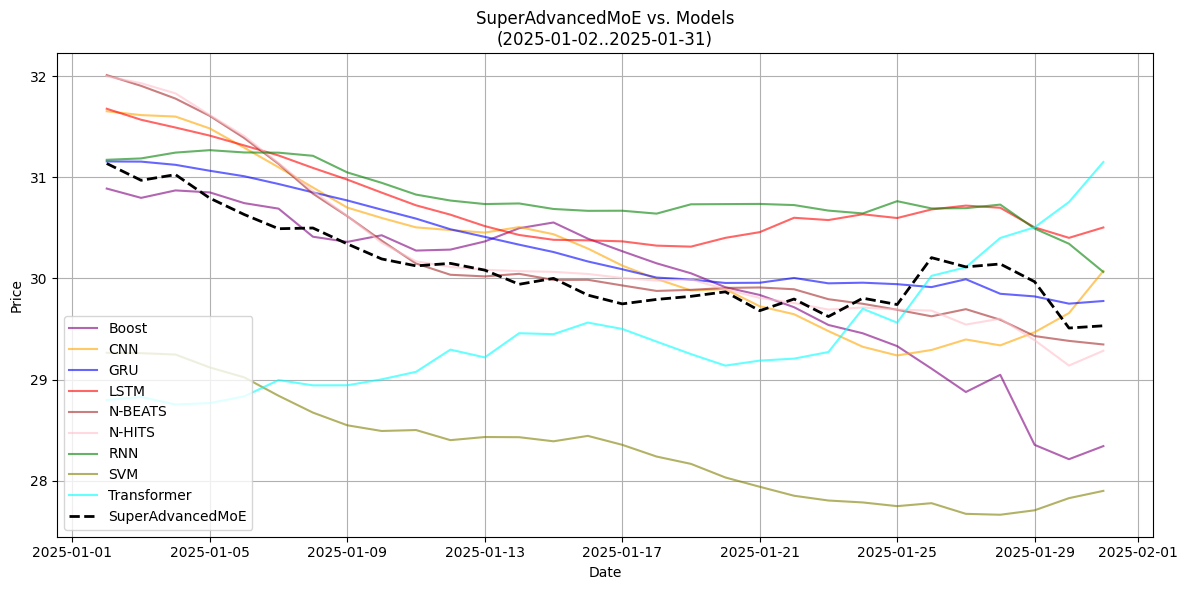

/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/jimbo/ENTER/envs/pytorch/lib/python3.12/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: 

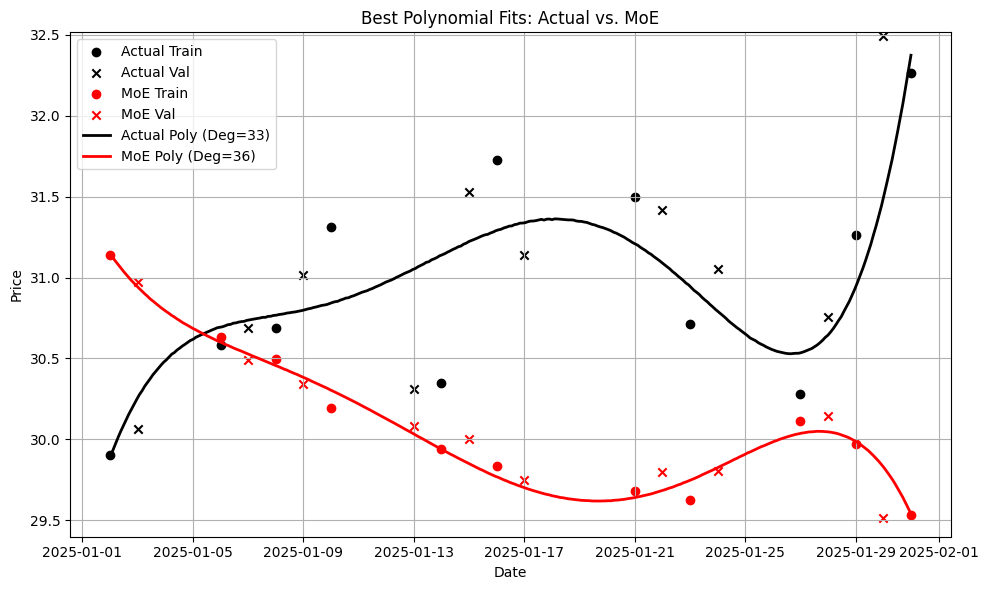


=== Best Polynomial Fitting Results (MoE vs. Actual) ===
[Actual] => Degree=33, Val MSE=0.196528
     y = 3.1306e-130*x^33+5.7268e-127*x^32-5.2944e-122*x^31-1.6228e-117*x^30-3.3030e-113*x^29-5.3272e-109*x^28-6.4770e-105*x^27-3.8701e-101*x^26+1.1066e-96*x^25+5.3698e-92*x^24+1.5450e-87*x^23+3.5944e-83*x^22+7.3665e-79*x^21+1.3457e-74*x^20+2.1904e-70*x^19+2.8363e-66*x^18+1.8197e-62*x^17-3.9173e-58*x^16-2.2837e-53*x^15-7.0772e-49*x^14-1.7832e-44*x^13-3.9486e-40*x^12-7.7481e-36*x^11-1.3630e-31*x^10-1.8924e-27*x^9-1.6456e-23*x^8+1.9813e-19*x^7+1.5442e-14*x^6+5.0809e-10*x^5+1.2593e-05*x^4+2.5026e-01*x^3+3.3065e+03*x^2-1.4261e+07*x-3.1924e+12

[MoE] => Degree=36, Val MSE=0.015588
     y = -0.0000e+00*x^36-2.5209e-139*x^35-7.3678e-136*x^34+3.6811e-131*x^33+1.2284e-126*x^32+2.6340e-122*x^31+4.5900e-118*x^30+6.4438e-114*x^29+5.9969e-110*x^28-2.3357e-106*x^27-2.9732e-101*x^26-1.0177e-96*x^25-2.6124e-92*x^24-5.7826e-88*x^23-1.1524e-83*x^22-2.0581e-79*x^21-3.2609e-75*x^20-4.2884e-71*x^19-3.0768e-67*

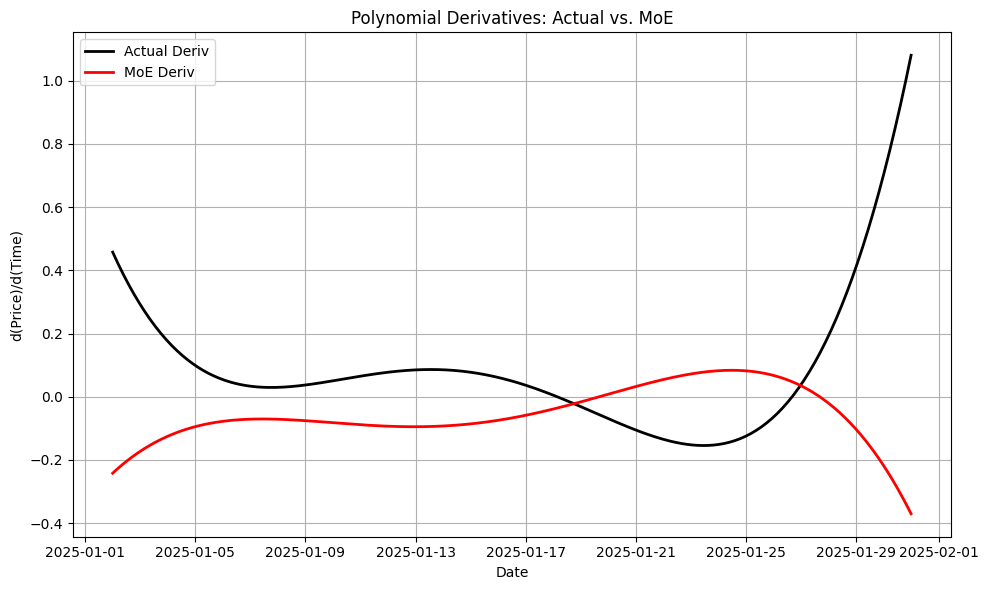


=== DAILY DIFFERENCES FOR ALL MODELS (9 + MoE) ===
    Model       Date  Pred_Price_unscaled  ActualPrice  DailyDiff  AbsError
0   Boost 2024-12-02            31.045956       30.742   0.303956  0.303956
1   Boost 2024-12-02            31.136275       30.742   0.394275  0.394275
2   Boost 2024-12-03            31.662073       31.363   0.299073  0.299073
3   Boost 2024-12-03            31.133609       31.363  -0.229391  0.229391
4   Boost 2024-12-03            31.052601       31.363  -0.310399  0.310399
5   Boost 2024-12-04            31.191013       31.786  -0.594987  0.594987
6   Boost 2024-12-04            31.534354       31.786  -0.251646  0.251646
7   Boost 2024-12-04            31.574636       31.786  -0.211364  0.211364
8   Boost 2024-12-04            31.778264       31.786  -0.007736  0.007736
9   Boost 2024-12-05            31.106886       31.406  -0.299114  0.299114
10  Boost 2024-12-05            31.141474       31.406  -0.264526  0.264526
11  Boost 2024-12-05            31.2

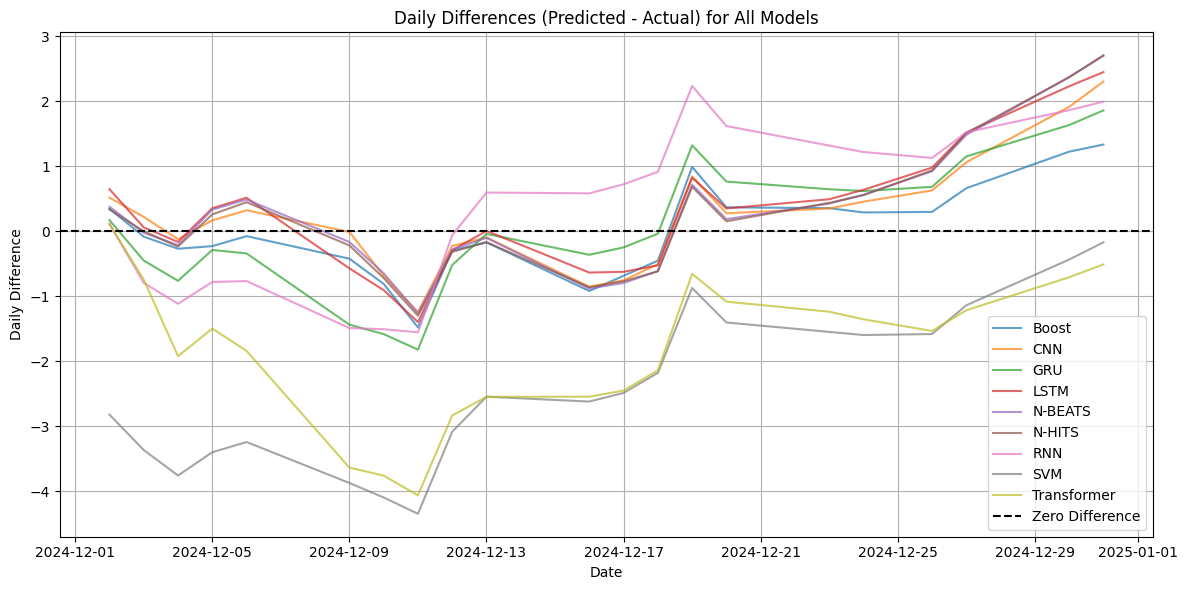

Model=Boost, Deg=1, MSE=0.4786, Confidence=0.6763
Model=CNN, Deg=2, MSE=0.2426, Confidence=0.8047
Model=GRU, Deg=8, MSE=0.0065, Confidence=0.9935
Model=LSTM, Deg=9, MSE=0.0022, Confidence=0.9978
Model=N-BEATS, Deg=6, MSE=0.0754, Confidence=0.9299
Model=N-HITS, Deg=5, MSE=0.0650, Confidence=0.9390
Model=RNN, Deg=2, MSE=0.0028, Confidence=0.9973
Model=SVM, Deg=8, MSE=0.0684, Confidence=0.9360
Model=Transformer, Deg=1, MSE=0.0850, Confidence=0.9217

=== Top 5 Models by Confidence ===
['LSTM', 'RNN', 'GRU', 'N-HITS', 'SVM']


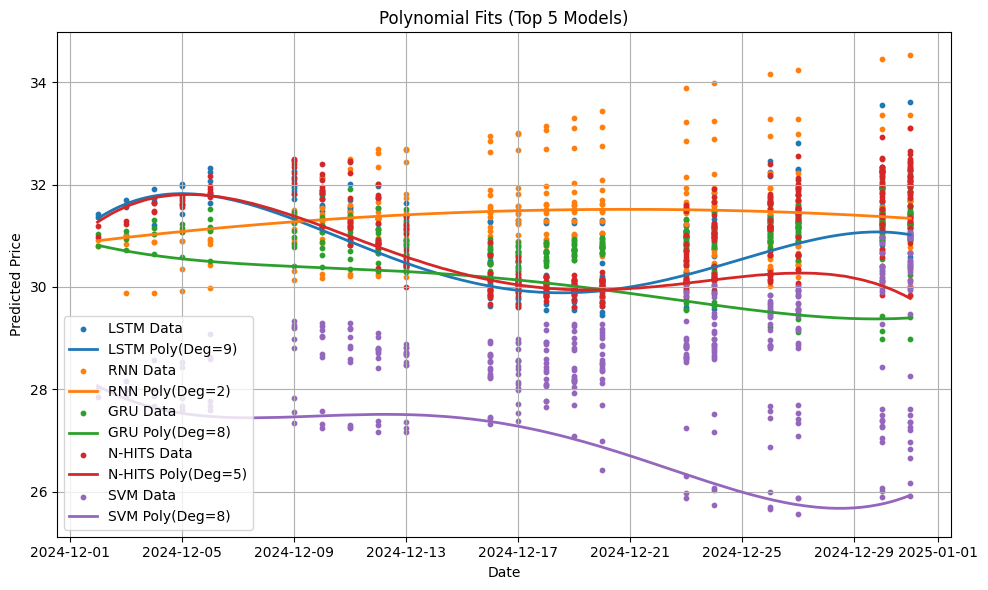

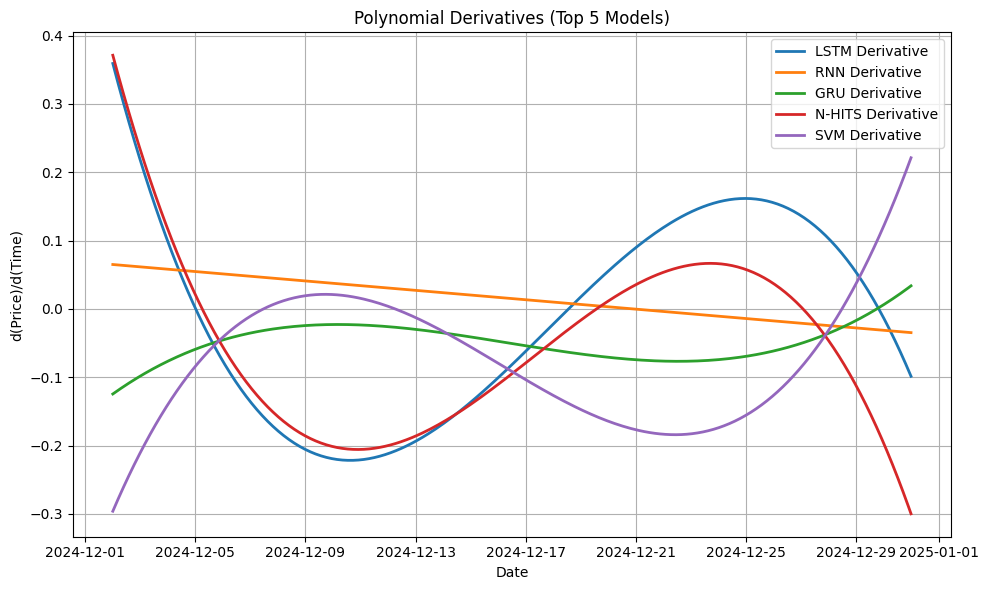


All done!


In [5]:
####################################################
# SUPER MERGED + REVISED SCRIPT:
# Includes daily differences and polynomial fittings
# for all 9 base models + the Mixture of Experts (MoE).
#
# Then computes absolute errors, selects top 5, and
# plots polynomial fits & derivatives of those top 5.
####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import joblib

from numpy.polynomial.polynomial import polyfit, polyval
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

############################################
# 0) Global seeds & device
############################################
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

############################################
# GLOBALS
############################################
BEST_MODELS_DIR = "."   # Where your best_{mt}_{YYYY-mm-dd}_V1 pt/pkl model files are
features = ["Price","Open","High","Low"]
WINDOW_SIZE = 35

# Example cutoffs (tweak if needed to match your data)
train_cutoff= pd.to_datetime("2024-07-01")
val_cutoff  = pd.to_datetime("2024-11-30")
test_cutoff = pd.to_datetime("2024-12-01")


############################################
# 1) Data Loading
############################################
def load_and_scale_data(train_csv="Silver Futures Historical Data.csv",
                        complete_csv="Silver Futures Historical Data_Complete.csv"):
    """
    Loads two CSVs:
      1) 'train_csv': for training date range
      2) 'complete_csv': the entire timeline
    Then sorts/drops columns, fits a MinMaxScaler from the train portion,
    and returns (df_sorted, df_complete, scaler).
    """
    # Load train CSV
    df_traincsv = pd.read_csv(train_csv)
    df_traincsv["Date"] = pd.to_datetime(df_traincsv["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_traincsv.columns:
            df_traincsv.drop(columns=[col], errors="ignore", inplace=True)

    for feat in features:
        if feat not in df_traincsv.columns:
            df_traincsv[feat]= np.nan
        else:
            df_traincsv[feat]= df_traincsv[feat].astype(str).str.replace(",", "", regex=True)
            df_traincsv[feat]= pd.to_numeric(df_traincsv[feat], errors="coerce")

    df_traincsv.sort_values("Date", inplace=True)
    df_traincsv.reset_index(drop=True, inplace=True)

    # Simple date splits
    df_trn = df_traincsv[df_traincsv["Date"]< train_cutoff].copy()
    df_val = df_traincsv[(df_traincsv["Date"]>=train_cutoff)&(df_traincsv["Date"]<= val_cutoff)].copy()
    df_tst = df_traincsv[df_traincsv["Date"]>= test_cutoff].copy()

    df_trn_nonan= df_trn.dropna(subset=features)
    scaler= MinMaxScaler()
    if not df_trn_nonan.empty:
        scaler.fit(df_trn_nonan[features])

    df_trn_scaled= df_trn.copy()
    if not df_trn_nonan.empty:
        df_trn_scaled.loc[df_trn_nonan.index, features]= scaler.transform(df_trn_nonan[features])

    df_val_scaled= df_val.copy()
    val_no_nan= df_val_scaled.dropna(subset=features)
    if not val_no_nan.empty:
        df_val_scaled.loc[val_no_nan.index, features]= scaler.transform(val_no_nan[features])

    df_tst_scaled= df_tst.copy()
    if not df_tst_scaled.empty:
        train_mins= df_trn_nonan[features].min()
        df_tst_filled= df_tst_scaled[features].fillna(train_mins)
        df_tst_scaled.loc[:, features] = scaler.transform(df_tst_filled)

    df_scaled = pd.concat([df_trn_scaled, df_val_scaled, df_tst_scaled], ignore_index=True)
    df_scaled.sort_values("Date", inplace=True)
    df_scaled.reset_index(drop=True, inplace=True)

    # also load the complete CSV
    df_complete = pd.read_csv(complete_csv)
    df_complete["Date"]= pd.to_datetime(df_complete["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_complete.columns:
            df_complete.drop(columns=[col], errors="ignore", inplace=True)
    for feat in features:
        df_complete[feat]= df_complete[feat].astype(str).str.replace(",", "",regex=True).astype(float)
    df_complete.sort_values("Date", inplace=True)
    df_complete.reset_index(drop=True, inplace=True)

    return df_scaled, df_complete, scaler


############################################
# 2) Model Definitions & Loading
############################################
class BaseModel(nn.Module):
    def __init__(self, model_type="LSTM", window_width=35):
        super().__init__()
        self.model_type = model_type

        if model_type=="CNN":
            self.conv1 = nn.Conv1d(4,64,3)
            self.conv2 = nn.Conv1d(64,128,3)
            with torch.no_grad():
                dummy = torch.zeros(1,4,window_width)
                outdummy = self.conv2(F.relu(self.conv1(dummy)))
                conv_output_size = outdummy.shape[1]*outdummy.shape[2]
            self.fc = nn.Linear(conv_output_size,4)

        elif model_type=="LSTM":
            self.rnn = nn.LSTM(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="GRU":
            self.rnn = nn.GRU(4,128,num_layers=2,batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="RNN":
            self.rnn = nn.RNN(4,128,num_layers=2,nonlinearity="relu",batch_first=True,dropout=0.1)
            self.fc = nn.Linear(128,4)

        elif model_type=="EnhancedLSTM":
            self.rnn = nn.LSTM(4,128,num_layers=3,batch_first=True,dropout=0.2)
            self.bn  = nn.BatchNorm1d(128)
            self.dropout= nn.Dropout(0.2)
            self.fc= nn.Linear(128,4)

        elif model_type=="Transformer":
            self.input_linear = nn.Linear(4,128)
            enc_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8, dropout=0.1)
            self.transformer_encoder = nn.TransformerEncoder(enc_layer, num_layers=3)
            self.fc = nn.Linear(128,4)

        elif model_type in ["N-BEATS","N-HITS"]:
            self.input_size= window_width*4
            self.blocks= nn.ModuleList([nn.Sequential(
                nn.Linear(self.input_size,128),
                nn.ReLU(),
                nn.Linear(128,128),
                nn.ReLU(),
                nn.Linear(128,4)
            ) for _ in range(3)])
        else:
            raise ValueError(f"Invalid model_type: {model_type}")

    def forward(self, x):
        if self.model_type=="CNN":
            x= x.permute(0,2,1)
            x= F.relu(self.conv1(x))
            x= F.relu(self.conv2(x))
            x= x.view(x.size(0),-1)
            return self.fc(x)

        elif self.model_type in ["LSTM","GRU","RNN"]:
            out, _= self.rnn(x)
            out= out[:,-1,:]
            return self.fc(out)

        elif self.model_type=="EnhancedLSTM":
            out, _= self.rnn(x)
            out = out[:,-1,:]
            out = self.bn(out)
            out = self.dropout(out)
            return self.fc(out)

        elif self.model_type=="Transformer":
            x= self.input_linear(x)   # [batch,window,128]
            x= x.permute(1,0,2)       # [window,batch,128]
            x= self.transformer_encoder(x)
            x= x[-1,:,:]
            return self.fc(x)

        elif self.model_type in ["N-BEATS","N-HITS"]:
            xflat= x.reshape(x.size(0), -1)
            forecast=0
            for block in self.blocks:
                forecast += block(xflat)
            return forecast

        else:
            raise ValueError("Invalid model_type")


class SklearnWrapper:
    def __init__(self, model):
        self.model= model
    def forward(self, x):
        arr= x.cpu().numpy().reshape(1,-1)
        pred= self.model.predict(arr)
        return torch.from_numpy(pred).float().to(x.device)
    def eval(self):
        pass
    def __call__(self, x):
        return self.forward(x)


def load_torch_model(model_type, window_size, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[PyTorch] Loading {model_type} from {path}")
    net= BaseModel(model_type, window_size).to(device)
    net.load_state_dict(torch.load(path, map_location=device))
    net.eval()
    return net

def load_sklearn_model(model_type, path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    print(f"[sklearn] Loading {model_type} => {path}")
    loaded= joblib.load(path)
    return SklearnWrapper(loaded)


############################################
# 3) "Rolling" or "Daily" Forecast
############################################
def get_latest_window(df_actual, current_date, window=35, scaler=None):
    mask= df_actual["Date"]< current_date
    sub= df_actual.loc[mask].copy()
    sub.sort_values("Date", inplace=True)
    if len(sub)< window:
        return None
    sub[features]= sub[features].fillna(method="ffill").fillna(method="bfill")
    arr= scaler.transform(sub[features].iloc[-window:].values)
    return arr

def forecast_n_days_from_date(model, df_actual, start_date, window=35, horizon=30,
                              device=None, scaler=None, noise_std=0.05):
    """
    Rolling forecast with mild random noise => more "volatility".
    """
    def add_noise_4d(prices, std=0.01):
        noise= np.random.normal(0.0, std, size=prices.shape)
        return np.clip(prices+noise, a_min=0, a_max=None)

    arr_window= get_latest_window(df_actual, start_date, window, scaler)
    if arr_window is None:
        return pd.DataFrame()

    rolling_buffer= np.copy(arr_window)
    forecast_records=[]
    cur_dt= pd.to_datetime(start_date)

    for i in range(horizon):
        X_in= torch.tensor(rolling_buffer,dtype=torch.float).unsqueeze(0).to(device)
        with torch.no_grad():
            out_scaled= model(X_in).cpu().numpy()[0]
        out_unscaled= scaler.inverse_transform(out_scaled.reshape(1,-1))[0]
        out_noisy= add_noise_4d(out_unscaled, noise_std)

        dayx= cur_dt+ pd.Timedelta(days=i)
        forecast_records.append({
            "ForecastDate": dayx,
            "Pred_Price_unscaled": out_noisy[0],
            "Pred_Open_unscaled":  out_noisy[1],
            "Pred_High_unscaled":  out_noisy[2],
            "Pred_Low_unscaled":   out_noisy[3]
        })

        out_noisy_scaled= scaler.transform(out_noisy.reshape(1,-1))[0]
        rolling_buffer= np.vstack([rolling_buffer[1:], out_noisy_scaled.reshape(1,-1)])

    return pd.DataFrame(forecast_records)


def rolling_train_validate_predict_moe(
    df_full, scaler_obj, model_types,
    start_train_cutoff=pd.to_datetime("2024-07-01"),
    start_val_cutoff=pd.to_datetime("2024-11-30"),
    start_pred=pd.to_datetime("2024-12-01"),
    end_pred=pd.to_datetime("2025-01-01"),
    horizon_days=30,
    do_daily_plots=False
):
    """
    For each day in date range [start_pred..end_pred],
    we "load" each model with the naming best_{mt}_{day_i}_V1,
    forecast next horizon_days, etc. Return a big DF with all predictions.
    """
    df_sorted= df_full.copy()
    df_sorted.sort_values("Date", inplace=True)

    date_rng= pd.date_range(start_pred, end_pred, freq="D")
    all_records=[]

    for i, day_i in enumerate(date_rng):
        train_cutoff_i= start_train_cutoff + pd.Timedelta(days=i)
        val_cutoff_i  = start_val_cutoff   + pd.Timedelta(days=i)

        print(f"\n=== Rolling Day {day_i.date()} ===")
        print(f"  train_cutoff={train_cutoff_i.date()}  val_cutoff={val_cutoff_i.date()}")
        print(f"  Forecast next {horizon_days} days from {day_i.date()} w/ noise => more volatility")

        # Load each model from best_{mt}_{day_i}_V1
        model_dict={}
        for mt in model_types:
            out_file= f"best_{mt}_{day_i.strftime('%Y-%m-%d')}_V1"
            if mt in ["SVM","GPR","Boost"]:
                out_file+= ".pkl"
                net= load_sklearn_model(mt, os.path.join(BEST_MODELS_DIR, out_file))
            else:
                out_file+= ".pt"
                net= load_torch_model(mt, WINDOW_SIZE, os.path.join(BEST_MODELS_DIR, out_file))
            model_dict[mt]= net

        daily_fcst={}
        for mt, netobj in model_dict.items():
            df_fc= forecast_n_days_from_date(
                model=netobj,
                df_actual=df_sorted,
                start_date=day_i,
                window=WINDOW_SIZE,
                horizon=horizon_days,
                device=device,
                scaler=scaler_obj,
                noise_std=0.01
            )
            if not df_fc.empty:
                df_fc["BaseDate"]= day_i
                df_fc["Model"]= mt
                daily_fcst[mt]= df_fc
                all_records.append(df_fc)
            else:
                daily_fcst[mt]= pd.DataFrame()

        if do_daily_plots and (day_i== date_rng[-1]):
            pass  # Optionally, you can do daily plots here

    df_all= pd.concat(all_records, ignore_index=True) if all_records else pd.DataFrame()
    df_all.sort_values(["Model","BaseDate","ForecastDate"], inplace=True)
    return df_all


############################################
# 4) Mixture of Experts Computation
############################################
def build_mini_models_table(final_rolling_fcst, df_actual):
    """
    For each (model, baseDate), measure january performance => build table
    for the super advanced MoE weighting. 
    """
    start_jan= pd.to_datetime("2024-12-01")
    end_jan=   pd.to_datetime("2025-01-01")
    df_jan= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= start_jan)&
        (final_rolling_fcst["ForecastDate"]<= end_jan)
    ].copy()
    if df_jan.empty:
        return pd.DataFrame(), 0.01

    df_act_jan= df_actual[
        (df_actual["Date"]>= start_jan)&
        (df_actual["Date"]<= end_jan)
    ].copy()
    df_act_jan.rename(columns={"Date":"ForecastDate","Price":"ActualPrice"}, inplace=True)

    df_merge= pd.merge(
        df_jan[["Model","BaseDate","ForecastDate","Pred_Price_unscaled"]],
        df_act_jan[["ForecastDate","ActualPrice"]],
        on="ForecastDate",
        how="inner"
    )
    df_merge["AbsError"]= (df_merge["Pred_Price_unscaled"]- df_merge["ActualPrice"]).abs()

    # mae
    g_mae= df_merge.groupby(["Model","BaseDate"])["AbsError"].mean().reset_index()
    g_mae.rename(columns={"AbsError":"mae_jan"}, inplace=True)

    # slope alignment => quick polynomial fit
    def poly_slope_diff(sub):
        sub= sub.sort_values("ForecastDate")
        xvals= np.arange(len(sub))
        yvals= sub["Pred_Price_unscaled"].values
        if len(yvals)< 4:
            return 0.5
        coefs= polyfit(xvals,yvals,deg=2)
        y_pred= polyval(xvals, coefs)
        resid= yvals- y_pred
        sse= np.mean(resid**2)
        return float(np.exp(-sse))

    def group_slope_func(grp):
        grp["slopeAlign_jan"]= poly_slope_diff(grp)
        return grp

    df_slope= df_merge.groupby(["Model","BaseDate"], group_keys=False).apply(group_slope_func)
    df_slope_agg= df_slope.groupby(["Model","BaseDate"])["slopeAlign_jan"].mean().reset_index()

    # real vol
    df_act_jan_sorted= df_act_jan.drop_duplicates("ForecastDate").copy()
    df_act_jan_sorted.sort_values("ForecastDate", inplace=True)
    df_act_jan_sorted["DayChange"]= df_act_jan_sorted["ActualPrice"].diff()
    real_vol= df_act_jan_sorted["DayChange"].std(skipna=True)
    if pd.isna(real_vol) or real_vol< 1e-9:
        real_vol= 0.01

    def mini_volatility(sub):
        sub= sub.sort_values("ForecastDate")
        sub["DayChange"]= sub["Pred_Price_unscaled"].diff()
        vol_= sub["DayChange"].std(skipna=True)
        if pd.isna(vol_): vol_= 0.01
        return vol_

    g_vol= df_merge.groupby(["Model","BaseDate"]).apply(mini_volatility).reset_index()
    g_vol.rename(columns={0:"predVol_jan"}, inplace=True)

    def vol_align(v):
        ratio= v/ real_vol
        return np.exp(-abs(ratio-1.0))

    g_vol["volAlign_jan"]= g_vol["predVol_jan"].apply(vol_align)

    mini_models= pd.merge(g_mae, df_slope_agg, on=["Model","BaseDate"], how="left")
    mini_models= pd.merge(mini_models, g_vol[["Model","BaseDate","predVol_jan","volAlign_jan"]], on=["Model","BaseDate"], how="left")

    mae_min= mini_models["mae_jan"].min()
    mae_max= mini_models["mae_jan"].max()
    if np.isclose(mae_min, mae_max):
        mini_models["baseAcc"]= 1.0
    else:
        mini_models["baseAcc"]= 1.0- ((mini_models["mae_jan"]-mae_min)/(mae_max-mae_min))

    return mini_models, real_vol

def compute_super_advanced_moe(final_rolling_fcst, df_actual):
    """
    Creates the final MoE dataframe from snippet 2 approach.
    """
    print("\n=== SUPER ADVANCED MOE w/ Polynomials & Voting ===\n")
    mini_models, real_vol= build_mini_models_table(final_rolling_fcst, df_actual)
    if mini_models.empty:
        print("No january data => fallback => uniform daily average")
        return pd.DataFrame(columns=["ForecastDate","MOE_Price"])

    mm_dict={}
    for i,row in mini_models.iterrows():
        mm_dict[(row["Model"], row["BaseDate"])]= {
            "baseAcc": row["baseAcc"],
            "slopeAlign_jan": row["slopeAlign_jan"],
            "volAlign_jan": row["volAlign_jan"]
        }

    start_moe= pd.to_datetime("2025-01-02")
    end_moe=   pd.to_datetime("2025-01-31")
    all_days=  pd.date_range(start_moe, end_moe, freq="D")
    records=[]

    for d in all_days:
        df_d= final_rolling_fcst[ final_rolling_fcst["ForecastDate"]== d ].copy()
        if df_d.empty:
            continue

        d_prev= d - pd.Timedelta(days=1)
        ups=0
        downs=0
        total=0
        w_sums=0.0
        weighted_price=0.0

        for idx,row in df_d.iterrows():
            m= row["Model"]
            bD= row["BaseDate"]
            if (m,bD) not in mm_dict:
                continue
            baseAcc= mm_dict[(m,bD)]["baseAcc"]
            slopeA= mm_dict[(m,bD)]["slopeAlign_jan"]
            volA= mm_dict[(m,bD)]["volAlign_jan"]

            df_dprev= final_rolling_fcst[
                (final_rolling_fcst["Model"]==m)&
                (final_rolling_fcst["BaseDate"]==bD)&
                (final_rolling_fcst["ForecastDate"]==d_prev)
            ]
            if df_dprev.empty:
                dirFactor=1.0
            else:
                pd_today= row["Pred_Price_unscaled"]
                pd_yest= df_dprev["Pred_Price_unscaled"].values[0]
                if pd_today> pd_yest:
                    ups+=1
                    dirFactor=1.1
                elif pd_today< pd_yest:
                    downs+=1
                    dirFactor=0.9
                else:
                    dirFactor=1.0
                total+=1

            w= baseAcc* slopeA* volA* dirFactor
            w_sums+= w
            weighted_price+= w* row["Pred_Price_unscaled"]

        if np.isclose(w_sums,0.0):
            day_moe= df_d["Pred_Price_unscaled"].mean()
        else:
            day_moe= weighted_price/ w_sums

        if total>0:
            fraction_up= ups/ total
            fraction_down= downs/ total
            if fraction_up> 0.7:
                day_moe*= 1.01
            elif fraction_down> 0.7:
                day_moe*= 0.99

        # random noise
        day_moe+= np.random.normal(0, day_moe*0.002)
        records.append({"ForecastDate": d, "MOE_Price": day_moe})

    df_moe= pd.DataFrame(records)
    df_moe.sort_values("ForecastDate", inplace=True)
    return df_moe


############################################
# 5) Plot + Polynomial Fitting for MoE vs. Actual
############################################
def plot_super_advanced_moe_vs_models(final_rolling_fcst, df_moe,
                                      from_d=pd.to_datetime("2025-01-02"),
                                      to_d=pd.to_datetime("2025-01-31")):
    """
    We can display all base model lines + the advanced MoE in [from_d..to_d].
    """
    df_sel= final_rolling_fcst[
        (final_rolling_fcst["ForecastDate"]>= from_d)&
        (final_rolling_fcst["ForecastDate"]<= to_d)
    ].copy()

    plt.figure(figsize=(12,6))
    color_map = {
        "LSTM":"red","GRU":"blue","RNN":"green","CNN":"orange","EnhancedLSTM":"magenta",
        "Transformer":"cyan","N-BEATS":"brown","N-HITS":"pink","SVM":"olive","Boost":"purple","GPR":"teal"
    }
    for m in df_sel["Model"].unique():
        df_m= df_sel[df_sel["Model"]== m].copy()
        df_m_agg= df_m.groupby("ForecastDate", as_index=False)["Pred_Price_unscaled"].mean()
        c= color_map.get(m,"gray")
        plt.plot(df_m_agg["ForecastDate"], df_m_agg["Pred_Price_unscaled"], color=c, alpha=0.6, label=m)

    df_moe_sub= df_moe[
        (df_moe["ForecastDate"]>= from_d)&
        (df_moe["ForecastDate"]<= to_d)
    ].copy()
    if not df_moe_sub.empty:
        plt.plot(df_moe_sub["ForecastDate"], df_moe_sub["MOE_Price"],
                 color="black",linestyle="--",lw=2, label="SuperAdvancedMoE")

    plt.title(f"SuperAdvancedMoE vs. Models\n({from_d.date()}..{to_d.date()})")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def polynomial_fitting_actual_and_moe(df_moe,
                                      csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
                                      max_degree=70):
    """
    As in snippet 1: we do polynomial fittings for "MoE" vs. "Actual"
    and plot derivative curves as well.
    """
    # Load actual data
    df_actual = pd.read_csv(csv_actual)
    df_actual["Date"] = pd.to_datetime(df_actual["Date"], errors="coerce")
    for col in ["Vol.","Change %"]:
        if col in df_actual.columns:
            df_actual.drop(columns=[col], errors="ignore", inplace=True)
    if "Price" in df_actual.columns:
        df_actual["Price"]= df_actual["Price"].astype(str).str.replace(",", "", regex=True).astype(float)
    df_actual.sort_values("Date", inplace=True)
    df_actual.reset_index(drop=True, inplace=True)

    # rename MoE
    df_moe_rename= df_moe.rename(columns={"ForecastDate":"Date","MOE_Price":"MoE"})
    df_moe_rename.sort_values("Date", inplace=True)
    df_moe_rename.reset_index(drop=True, inplace=True)

    # merge => columns: ["Date","MoE","Price"]
    df_merge= pd.merge(
        df_moe_rename, df_actual[["Date","Price"]],
        on="Date", how="inner"
    ).rename(columns={"Price":"Actual"})

    if df_merge.empty:
        print("No overlapping dates => cannot do polynomial fitting.")
        return

    df_merge.sort_values("Date", inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

    columns_to_fit= ["Actual","MoE"]
    df_merge["mdates_num"]= mdates.date2num(df_merge["Date"])
    n_points= len(df_merge)
    idx= np.arange(n_points)
    train_mask = (idx % 2==0)
    val_mask= ~train_mask

    best_poly_info= {}

    def format_poly(coeffs):
        terms=[]
        deg= len(coeffs)-1
        for i,c in enumerate(coeffs):
            p= deg-i
            if p>1:
                terms.append(f"{c:+.4e}*x^{p}")
            elif p==1:
                terms.append(f"{c:+.4e}*x")
            else:
                terms.append(f"{c:+.4e}")
        expr= "".join(terms).replace("+-","-")
        if expr.startswith("+"):
            expr= expr[1:]
        return expr

    # Fit polynomials
    for col in columns_to_fit:
        x_train= df_merge.loc[train_mask,"mdates_num"].values
        y_train= df_merge.loc[train_mask,col].values
        x_val= df_merge.loc[val_mask,"mdates_num"].values
        y_val= df_merge.loc[val_mask,col].values

        best_deg= None
        best_mse= float("inf")
        best_coefs= None

        for d_ in range(1, max_degree+1):
            coefs= np.polyfit(x_train, y_train, d_)
            preds_val= np.polyval(coefs, x_val)
            mse_= mean_squared_error(y_val, preds_val)
            if mse_< best_mse:
                best_mse= mse_
                best_deg= d_
                best_coefs= coefs
        best_poly_info[col]= {"degree": best_deg, "mse":best_mse, "coeffs": best_coefs}

    # Plot the best polynomials
    plt.figure(figsize=(10,6))
    # scatter actual data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"Actual"],
                color="black", marker="o", label="Actual Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"Actual"],
                color="black", marker="x", label="Actual Val")

    # scatter MoE data
    plt.scatter(df_merge.loc[train_mask,"Date"], df_merge.loc[train_mask,"MoE"],
                color="red", marker="o", label="MoE Train")
    plt.scatter(df_merge.loc[val_mask,"Date"], df_merge.loc[val_mask,"MoE"],
                color="red", marker="x", label="MoE Val")

    x_dense= np.linspace(df_merge["mdates_num"].min(), df_merge["mdates_num"].max(), 300)
    x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

    color_map= {"Actual":"black","MoE":"red"}
    for col in columns_to_fit:
        info= best_poly_info[col]
        deg_= info["degree"]
        coefs_= info["coeffs"]
        color_= color_map[col] if col in color_map else "gray"
        y_dense= np.polyval(coefs_, x_dense)
        plt.plot(x_dense_dates, y_dense, color=color_, linewidth=2,
                 label=f"{col} Poly (Deg={deg_})")

    plt.title("Best Polynomial Fits: Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\n=== Best Polynomial Fitting Results (MoE vs. Actual) ===")
    for col in columns_to_fit:
        deg_= best_poly_info[col]["degree"]
        mse_= best_poly_info[col]["mse"]
        coefs_= best_poly_info[col]["coeffs"]
        expr_= format_poly(coefs_)
        print(f"[{col}] => Degree={deg_}, Val MSE={mse_:.6f}")
        print(f"     y = {expr_}\n")

    # Derivative
    plt.figure(figsize=(10,6))
    for col in columns_to_fit:
        coefs_= best_poly_info[col]["coeffs"]
        d_coefs_= np.polyder(coefs_)
        y_deriv= np.polyval(d_coefs_, x_dense)
        color_ = color_map[col] if col in color_map else "gray"
        plt.plot(x_dense_dates, y_deriv, color=color_, linewidth=2, label=f"{col} Deriv")

    plt.title("Polynomial Derivatives: Actual vs. MoE")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

############################################
# 6) NEW: Daily Differences & Polynomials
#         For All 9 Models + MoE
#         Then pick top 5 by confidence.
############################################

def compute_daily_diff_for_all_models(df_all_models, df_moe, df_actual):
    """
    Merge each model's predictions (including MoE) with actual, compute:
      - daily difference (Predicted - Actual)
      - absolute error.
    Returns a DataFrame with columns:
      ["Model", "Date", "Pred_Price_unscaled", "ActualPrice", "DailyDiff", "AbsError"].
    (MoE is treated as Model="MoE".)
    """
    # For MoE, keep ForecastDate intact; only rename MOE_Price to Pred_Price_unscaled.
    df_moe_cpy = df_moe.copy().rename(columns={"MOE_Price": "Pred_Price_unscaled"})
    df_moe_cpy["Model"] = "MoE"
    df_moe_cpy["BaseDate"] = pd.NaT  # No base date for MoE merges

    # Combine the base models (which have ForecastDate) with MoE.
    df_combined = pd.concat([df_all_models, df_moe_cpy], ignore_index=True)

    # Prepare actual prices (with "Date") for merging.
    df_actual_cpy = df_actual[["Date", "Price"]].copy().rename(columns={"Price": "ActualPrice"})
    
    # Merge using left_on "ForecastDate" (from our forecasts) and right_on "Date" (from actuals).
    df_merged = pd.merge(
        df_combined[["Model", "ForecastDate", "Pred_Price_unscaled"]],
        df_actual_cpy,
        left_on="ForecastDate",
        right_on="Date",
        how="left",
        suffixes=("", "_act")
    )
    # Drop the duplicate "Date" column from the actuals.
    df_merged.drop(columns=["Date"], errors="ignore", inplace=True)

    # Drop rows with no actual price data (i.e. forecasts beyond the actual dataset date range).
    df_merged = df_merged.dropna(subset=["ActualPrice"])

    # Compute daily difference and absolute error.
    df_merged["DailyDiff"] = df_merged["Pred_Price_unscaled"] - df_merged["ActualPrice"]
    df_merged["AbsError"]  = df_merged["DailyDiff"].abs()

    # Now rename ForecastDate to Date to get a unified column.
    df_merged.rename(columns={"ForecastDate": "Date"}, inplace=True)

    # Sort and reset the index.
    df_merged.sort_values(["Model", "Date"], inplace=True)
    df_merged.reset_index(drop=True, inplace=True)

    return df_merged



def plot_daily_differences_all_models(df_diff):
    """
    Quick line plot of daily differences (Pred - Actual) for each model over time.
    """
    plt.figure(figsize=(12,6))
    for m in df_diff["Model"].unique():
        df_m = df_diff[df_diff["Model"]==m].copy()
        df_m_agg = df_m.groupby("Date", as_index=False)["DailyDiff"].mean()
        plt.plot(df_m_agg["Date"], df_m_agg["DailyDiff"], label=m, alpha=0.7)
    plt.axhline(y=0.0, color="black", linestyle="--", label="Zero Difference")
    plt.title("Daily Differences (Predicted - Actual) for All Models")
    plt.xlabel("Date")
    plt.ylabel("Daily Difference")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def polynomial_fitting_each_model(df_diff, max_degree=50):
    """
    For each model, do a polynomial fit of predicted price vs. time
    (compared to actual). We'll store each model's best (degree, MSE, coefs).
    We'll also define a 'confidence' as 1/(1+MSE) just as a simple example.
    Return a dictionary model -> { 'degree':..., 'mse':..., 'coefs':..., 'confidence':... }
    """
    # We assume df_diff has columns: ["Model","Date","Pred_Price_unscaled","ActualPrice","DailyDiff","AbsError"]
    # We'll do the polynomial fit on the predicted price vs. numeric date
    df_diff["mdates_num"] = mdates.date2num(df_diff["Date"])
    results = {}

    for m in df_diff["Model"].unique():
        dsub = df_diff[df_diff["Model"]==m].copy().drop_duplicates("Date")
        dsub.sort_values("Date", inplace=True)
        if len(dsub)< 5:
            continue

        xvals = dsub["mdates_num"].values
        yvals = dsub["Pred_Price_unscaled"].values
        # We'll do a train/val split
        idx = np.arange(len(dsub))
        train_mask = (idx % 2 == 0)
        val_mask   = ~train_mask

        x_train = xvals[train_mask]
        y_train = yvals[train_mask]
        x_val   = xvals[val_mask]
        y_val   = yvals[val_mask]

        best_deg= None
        best_mse= float("inf")
        best_coefs= None

        for deg_ in range(1, max_degree+1):
            # might fail if not enough points
            if len(x_train)<=deg_:
                break
            coefs = np.polyfit(x_train, y_train, deg_)
            preds_val = np.polyval(coefs, x_val)
            mse_ = mean_squared_error(y_val, preds_val)
            if mse_ < best_mse:
                best_mse = mse_
                best_deg = deg_
                best_coefs = coefs

        if best_coefs is not None:
            conf = 1.0/(1.0 + best_mse)  # simple normalized measure
            results[m] = {
                "degree": best_deg,
                "mse": best_mse,
                "coeffs": best_coefs,
                "confidence": conf
            }
        else:
            results[m] = {
                "degree": 0,
                "mse": 9999.0,
                "coeffs": [0.0],
                "confidence": 0.0
            }

    return results


def select_top5_models(polynomial_results):
    """
    polynomial_results is a dict: model -> { 'degree':..., 'mse':..., 'confidence':... }
    Return a sorted list of top 5 models by confidence.
    """
    items = list(polynomial_results.items())  # [(model_name, info), ...]
    # sort by confidence descending
    items.sort(key=lambda x: x[1]["confidence"], reverse=True)
    top5 = items[:5]
    return [t[0] for t in top5]


def plot_polynomial_fits_for_models(df_diff, polynomial_results, models_to_plot):
    """
    Plot polynomial fits (price vs. date) for the given models.
    Also plot their derivative curves in a separate figure.
    """
    plt.figure(figsize=(10,6))

    for m in models_to_plot:
        if m not in polynomial_results:
            continue
        dsub = df_diff[df_diff["Model"]==m].copy()
        dsub.sort_values("Date", inplace=True)
        if dsub.empty:
            continue

        # scatter
        plt.scatter(dsub["Date"], dsub["Pred_Price_unscaled"], label=f"{m} Data", s=10)

        # best poly
        coefs = polynomial_results[m]["coeffs"]
        xvals = mdates.date2num(dsub["Date"])
        x_dense = np.linspace(xvals.min(), xvals.max(), 300)
        y_dense = np.polyval(coefs, x_dense)
        x_dense_dates= [mdates.num2date(xx) for xx in x_dense]
        plt.plot(x_dense_dates, y_dense, lw=2, label=f"{m} Poly(Deg={polynomial_results[m]['degree']})")

    plt.title("Polynomial Fits (Top 5 Models)")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Now derivatives
    plt.figure(figsize=(10,6))
    for m in models_to_plot:
        if m not in polynomial_results:
            continue
        coefs = polynomial_results[m]["coeffs"]
        d_coefs = np.polyder(coefs)
        # We'll pick the union of all x's from that model
        dsub = df_diff[df_diff["Model"]==m]
        if dsub.empty:
            continue
        xvals = mdates.date2num(dsub["Date"])
        x_dense = np.linspace(xvals.min(), xvals.max(), 300)
        y_deriv = np.polyval(d_coefs, x_dense)
        x_dense_dates= [mdates.num2date(xx) for xx in x_dense]

        plt.plot(x_dense_dates, y_deriv, lw=2, label=f"{m} Derivative")

    plt.title("Polynomial Derivatives (Top 5 Models)")
    plt.xlabel("Date")
    plt.ylabel("d(Price)/d(Time)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


############################################
# 7) MAIN EXAMPLE
############################################
if __name__=="__main__":
    # 1) Load & scale data
    df_scaled, df_complete_all, scaler= load_and_scale_data(
        "Silver Futures Historical Data.csv",
        "Silver Futures Historical Data_Complete.csv"
    )

    # 2) Rolling multi-day predictions for each day,
    #    then compute the super advanced MoE.
    final_rolling_fc= rolling_train_validate_predict_moe(
        df_full= df_complete_all,
        scaler_obj= scaler,
        model_types=["LSTM","GRU","RNN","CNN","Transformer","N-BEATS","N-HITS","SVM","Boost"],
        start_train_cutoff=train_cutoff,
        start_val_cutoff=val_cutoff,
        start_pred=pd.to_datetime("2024-12-01"),
        end_pred=pd.to_datetime("2025-01-02"),
        horizon_days=30,
        do_daily_plots=False
    )
    print("\n=== HEAD of final_rolling_fc ===")
    print(final_rolling_fc.head(20))

    # 3) Compute MoE
    df_moe= compute_super_advanced_moe(final_rolling_fc, df_complete_all)

    # 4) Plot MoE vs. 9 base models
    plot_super_advanced_moe_vs_models(
        final_rolling_fc,
        df_moe,
        from_d=pd.to_datetime("2025-01-02"),
        to_d=pd.to_datetime("2025-01-31")
    )

    # 5) Polynomial Fitting: Actual vs. MoE
    polynomial_fitting_actual_and_moe(
        df_moe,
        csv_actual="Silver Futures Historical Data_Final Pure Predictions.csv",
        max_degree=70
    )

    # 6) NEW PART: Daily Differences, Polynomials for All 10 models
    #    (9 base + MoE).
    print("\n=== DAILY DIFFERENCES FOR ALL MODELS (9 + MoE) ===")
    df_diff_all = compute_daily_diff_for_all_models(
        df_all_models=final_rolling_fc,
        df_moe=df_moe,
        df_actual=df_complete_all
    )
    print(df_diff_all.head(20))

    # 6a) Plot daily differences
    plot_daily_differences_all_models(df_diff_all)

    # 6b) Polynomial Fitting for each model => pick top5
    poly_results = polynomial_fitting_each_model(df_diff_all, max_degree=30)
    for m,v in poly_results.items():
        print(f"Model={m}, Deg={v['degree']}, MSE={v['mse']:.4f}, Confidence={v['confidence']:.4f}")

    top5_models = select_top5_models(poly_results)
    print("\n=== Top 5 Models by Confidence ===")
    print(top5_models)

    # 6c) Plot polynomial fits & derivatives for top 5
    plot_polynomial_fits_for_models(df_diff_all, poly_results, top5_models)

    print("\nAll done!")
